# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import random

%matplotlib inline

# Configuration Settings

In [2]:
# pd.options.mode.chained_assignment = None
# %matplotlib qt

# pd.options.mode.chained_assignment = None
# This line of code is used to suppress warnings about chained assignments in pandas. 
# By setting this option to None, it prevents pandas from showing warnings 
# when you make assignments that might have unintended side effects due to chained indexing.

# %matplotlib qt
# This is a magic command in Jupyter Notebook or IPython that sets the backend of matplotlib to Qt5Agg, 
# which opens plots in a separate window with interactive features like zooming and panning.

# Distributions

## Load Data

In [3]:
# directories
DATA_DIR = r'C:\Users\Maintenant pret\OneDrive\Documents\Learn to Code With Basketball\code-basketball-files-main\data'

# load data
dfs = pd.read_csv(path.join(DATA_DIR, 'shots.csv'))  
dfg = pd.read_csv(path.join(DATA_DIR, 'games.csv'))  
dft = pd.read_csv(path.join(DATA_DIR, 'teams.csv'))
dftg = pd.read_csv(path.join(DATA_DIR, 'team_games.csv'))

## Process data

In [4]:
cats2 = ['layup', 'pullup', 'float', 'dunk', 'hook', 'fadeaway', 'step']
dfs['jump'] = dfs[cats2].sum(axis=1) == 0

dfs['shot_type'] = np.nan
for shot in cats2 + ['jump']:
    dfs.loc[dfs[shot], 'shot_type'] = shot

dfg.rename(columns={'home': 'home_team', 'away': 'away_team'}, inplace=True)

C:\Users\Maintenant pret\AppData\Local\Temp\ipykernel_33292\3758383411.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'layup' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dfs.loc[dfs[shot], 'shot_type'] = shot


In [5]:
dfs.head()

name  dist  value   made              desc team  opp    x    y  \
0     L. James     2      2   True        Layup Shot  LAC  LAL   -9   23   
1    L. Shamet    26      3  False  Pullup Jump shot  LAC  LAL  201  178   
2     D. Green    25      3   True         Jump Shot  LAC  LAL  125  221   
3  P. Beverley    26      3  False         Jump Shot  LAC  LAL  117  239   
4     A. Davis    18      2  False         Jump Shot  LAC  LAL   96  162   

   player_id  ...   step  cutting    tip             zone  \
0       2544  ...  False    False  False  Less Than 8 ft.   
1    1629013  ...  False    False  False          24+ ft.   
2     201980  ...  False    False  False          24+ ft.   
3     201976  ...  False    False  False          24+ ft.   
4     203076  ...  False    False  False        16-24 ft.   

                    area      date  period  min_left  sec_left  shot_type  
0              Center(C)  20191022       1        11        47      layup  
1  Right Side Center(RC)  20191022       1        11        40     pullup  
2  Right Side Center(RC)  20191022       1        11        23       jump  
3  Right Side Center(RC)  20191022       1        11         0       jump  
4  Right Side Center(RC)  20191022       1        10        47       jump  

[5 rows x 38 columns]

In [6]:
dfg.head()

game_id home_team away_team        date  home_pts  away_pts  min  \
0  21900001       TOR       NOP  2019-10-22       130       122  265   
1  21900002       LAC       LAL  2019-10-22       112       102  239   
2  21900003       CHA       CHI  2019-10-23       126       125  240   
3  21900004       IND       DET  2019-10-23       110       119  241   
4  21900005       ORL       CLE  2019-10-23        94        85  239   

   home_fgm  home_fga  home_fg_pct  ...  away_reb  away_ast  away_stl  \
0        42       103        0.408  ...        53        30         4   
1        42        81        0.519  ...        41        20         4   
2        45        88        0.511  ...        49        25        11   
3        41        89        0.461  ...        45        26         5   
4        37        86        0.430  ...        54        20         8   

   away_blk  away_tov  away_pf  away_plus_minus  bubble  sample   season  
0         9        19       34             -8.0   False   False  2019-20  
1         7        14       24            -10.0   False    True  2019-20  
2         4        10       20             -1.0   False   False  2019-20  
3         6        18       21              9.0   False   False  2019-20  
4         2        16       15             -9.0   False   False  2019-20  

[5 rows x 46 columns]

In [7]:
dft.head()

team_id                  full team   nickname         city  \
0  1610612737         Atlanta Hawks  ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics  BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers  CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans  NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls  CHI      Bulls      Chicago   

           state  founded   division conference  
0        Atlanta     1949  Southeast       East  
1  Massachusetts     1946   Atlantic       East  
2           Ohio     1970    Central       East  
3      Louisiana     2002  Southwest       West  
4       Illinois     1966    Central       East

In [8]:
dftg.head()

team        date      matchup wl  min  pts     team_id   game_id   season  \
0  HOU  2020-08-14  HOU vs. PHI  L  240   96  1610612745  21901315  2019-20   
1  HOU  2020-08-12  HOU vs. IND  L  239  104  1610612745  21901304  2019-20   
2  HOU  2020-08-11    HOU @ SAS  L  240  105  1610612745  21901298  2019-20   
3  HOU  2020-08-09    HOU @ SAC  W  240  129  1610612745  21901290  2019-20   
4  HOU  2020-08-06  HOU vs. LAL  W  238  113  1610612745  21901273  2019-20   

   fgm  ...  dreb  reb  ast  stl  blk  tov  pf  plus_minus  bubble  sample  
0   35  ...    26   27   25   10    9   17  18       -38.0    True   False  
1   32  ...    43   49   20    8    6   20  20        -4.0    True    True  
2   36  ...    33   37   18   14    3   18  19       -18.0    True    True  
3   43  ...    40   48   21    9    3   15  18        17.0    True   False  
4   36  ...    30   34   26   11    5   19  28        16.0    True    True  

[5 rows x 29 columns]

## Sumary Statistics in Pandas

In [9]:
dfs['dist'].quantile(.9)

# 90% shots taken from 26 feet

26.0

In [10]:
dfs[['dist', 'value']].describe()

dist         value
count  16876.000000  16876.000000
mean      13.432745      2.377992
std       10.621506      0.484900
min        0.000000      2.000000
25%        2.000000      2.000000
50%       13.000000      2.000000
75%       24.000000      3.000000
max       80.000000      3.000000

## Mean aka Average aka Expected value

In [11]:
# Expected value refers to fact that 
# mean = probability weighted sum of all outcomes

dfs['dist'].value_counts(normalize=True).sort_index().head(10)

# 8.04% from 0feet, 11.33% from 1, 8.45% from 2...
# Expected value = 8.04%*0 + 11.33%*1 + 8.45%*2...

dist
0    0.080410
1    0.113356
2    0.084499
3    0.041716
4    0.025421
5    0.022754
6    0.019021
7    0.017362
8    0.017421
9    0.016651
Name: proportion, dtype: float64

## One-Variable Density Plot

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


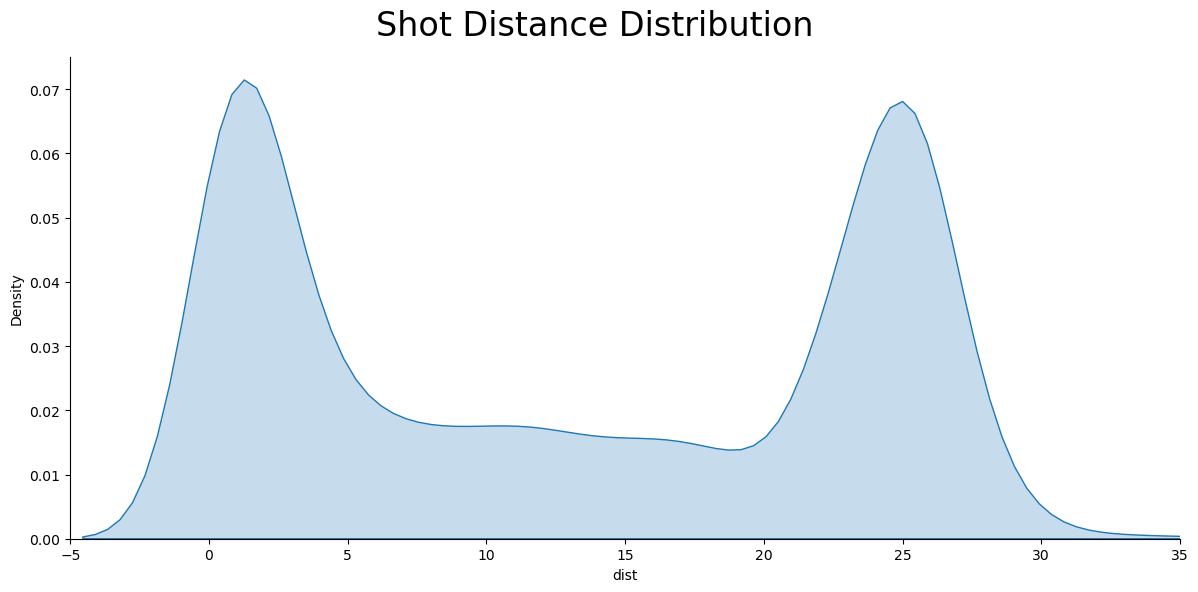

In [12]:
g = (sns.FacetGrid(dfs, height=6, aspect=2)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.suptitle('Shot Distance Distribution', fontsize=24)
g.fig.subplots_adjust(top=0.9)
g.set(xlim=(-5, 35))

plt.show()

### Inverse x-axis

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


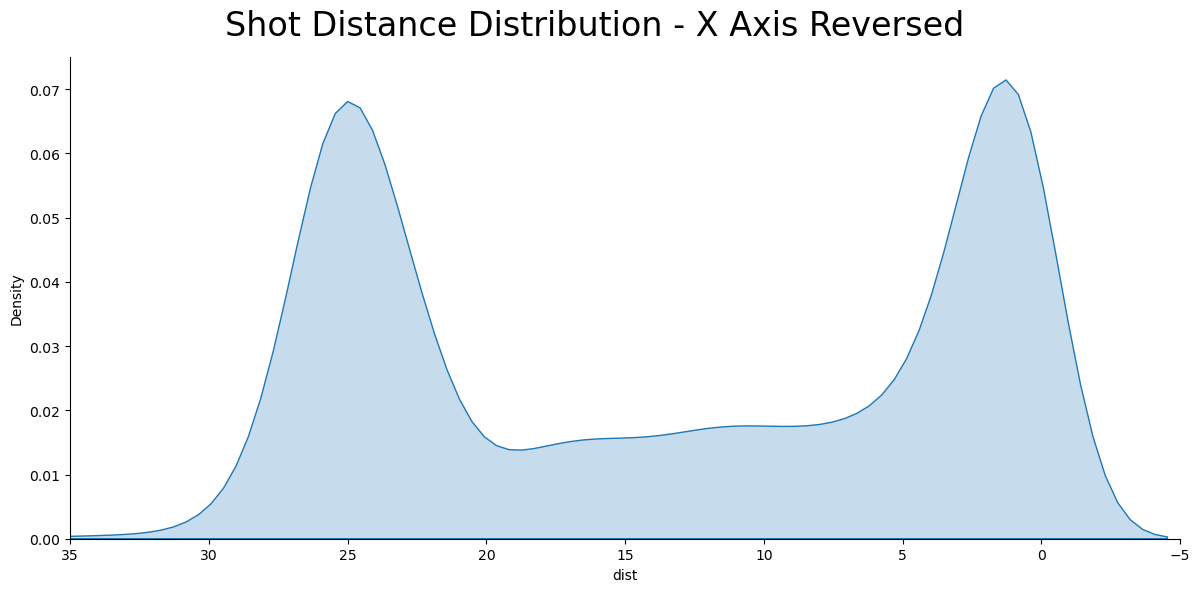

In [13]:
g = (sns.FacetGrid(dfs, height=6, aspect=2)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.suptitle('Shot Distance Distribution - X Axis Reversed', fontsize=24)
g.fig.subplots_adjust(top=0.9)
g.set(xlim=(-5, 35))
g.ax.invert_xaxis()

plt.show()

### Seaborn "Levers" - Slicing and Dicing Plots

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

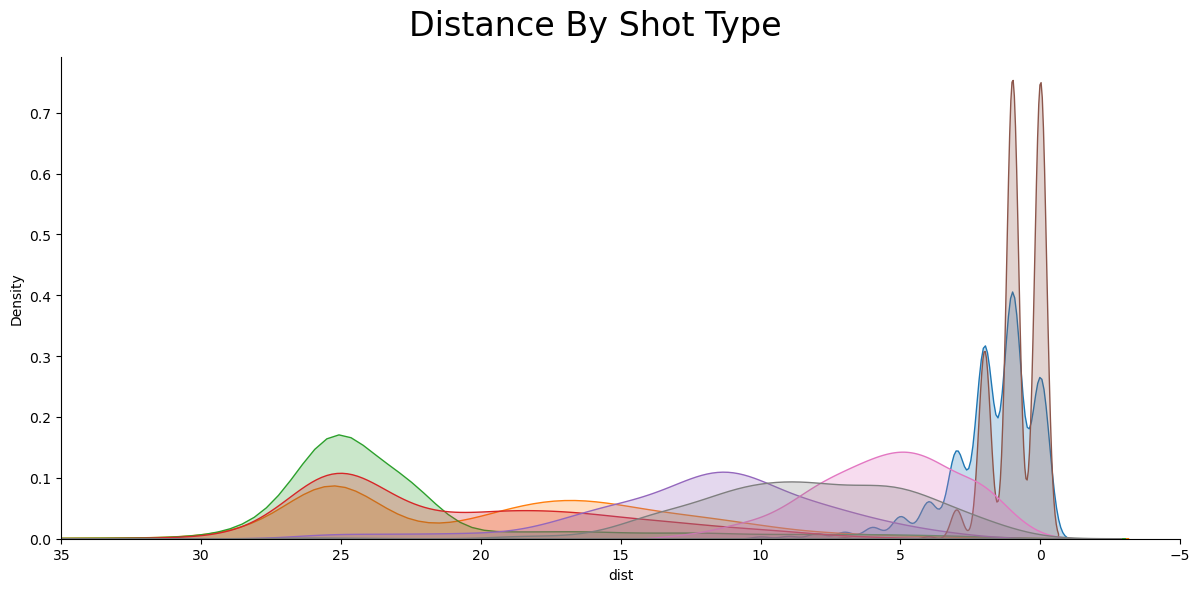

In [14]:
g = (sns.FacetGrid(dfs, hue='shot_type', height=6, aspect=2)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.suptitle('Distance By Shot Type', fontsize=24)
g.fig.subplots_adjust(top=0.9)
g.set(xlim=(-5, 35))
g.ax.invert_xaxis()

plt.show()

### Aside: Jittering

In [15]:
# add random data to each obs.
# --> jittering --> imrove visuals
import random

random.uniform(0, 1)

0.7772351605589566

In [16]:
# random numbers centered around 0. normal dist.

[random.gauss(0, 1) for _ in range(10)]

[0.20399770928735014,
 0.7569071515424242,
 -0.5519711104134882,
 -0.6794299961153236,
 -0.711411759867635,
 1.0123573127151881,
 -0.34104983904960406,
 -1.0228987131537606,
 0.20122211594447167,
 0.5980242299570542]

In [17]:
dfs['jdist'] = dfs['dist']

dfs.loc[dfs['shot_type'] == 'layup', 'jdist'] = dfs['dist'].apply(
        lambda x: x + random.gauss(0, 1))

# Adjust Layup Distances: 
# For 'layup' rows, jdist col  updated by 
# adding a normally distributed random noise 
# with mean 0 and standard deviation 1. 
# generated using random.gauss(0, 1) 
# within a lambda function applied to each distance.

dfs.loc[dfs['shot_type'] == 'dunk', 'jdist'] = dfs['dist'].apply(
        lambda x: x + random.gauss(0, 1))

C:\Users\Maintenant pret\AppData\Local\Temp\ipykernel_33292\1981720511.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2.10347839  0.15010603  3.24707298 ... -1.06701932 -0.01495754
 -0.44231112]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfs.loc[dfs['shot_type'] == 'layup', 'jdist'] = dfs['dist'].apply(


C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

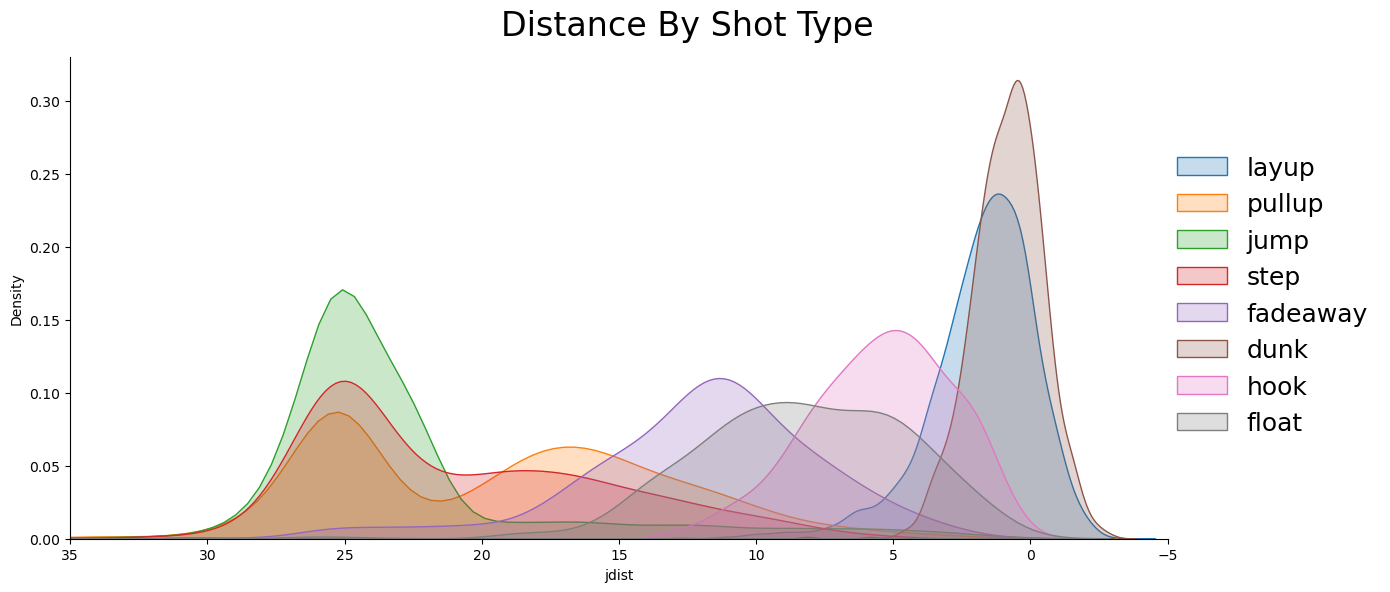

In [18]:
g = (sns.FacetGrid(dfs, hue='shot_type', height=6, aspect=2)
     .map(sns.kdeplot, 'jdist', shade=True))

g.fig.suptitle('Distance By Shot Type', fontsize=24)
g.fig.subplots_adjust(top=0.9)
g.set(xlim=(-5, 35))
g.ax.invert_xaxis()
g.add_legend(title="", fontsize=18)

plt.show()

## What is Jittering?

Jittering is a data visualization technique used to reduce overlap in plots where data points have the same or very similar values. It involves adding small amounts of random noise to data points, allowing them to be more easily distinguished.

## Why Use Jittering?

- **Clarity**: Helps to distinguish overlapping points in scatter plots or similar visualizations.
- **Density Estimation**: Makes it easier to understand the distribution and density of data points.
- **Visual Appeal**: Enhances the visual appeal and interpretability of the plot by reducing overplotting.

## Explanation of Visual Improvement

- **Distinguishing Points**: By adding normally distributed noise (jittering) to `dist`, points that would otherwise overlap are spread out, making individual data points more distinguishable.
- **Distribution Visualization**: The KDE plots show more accurate density estimations as the jittered values reveal underlying patterns more clearly.


### More Seaborn Levers

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

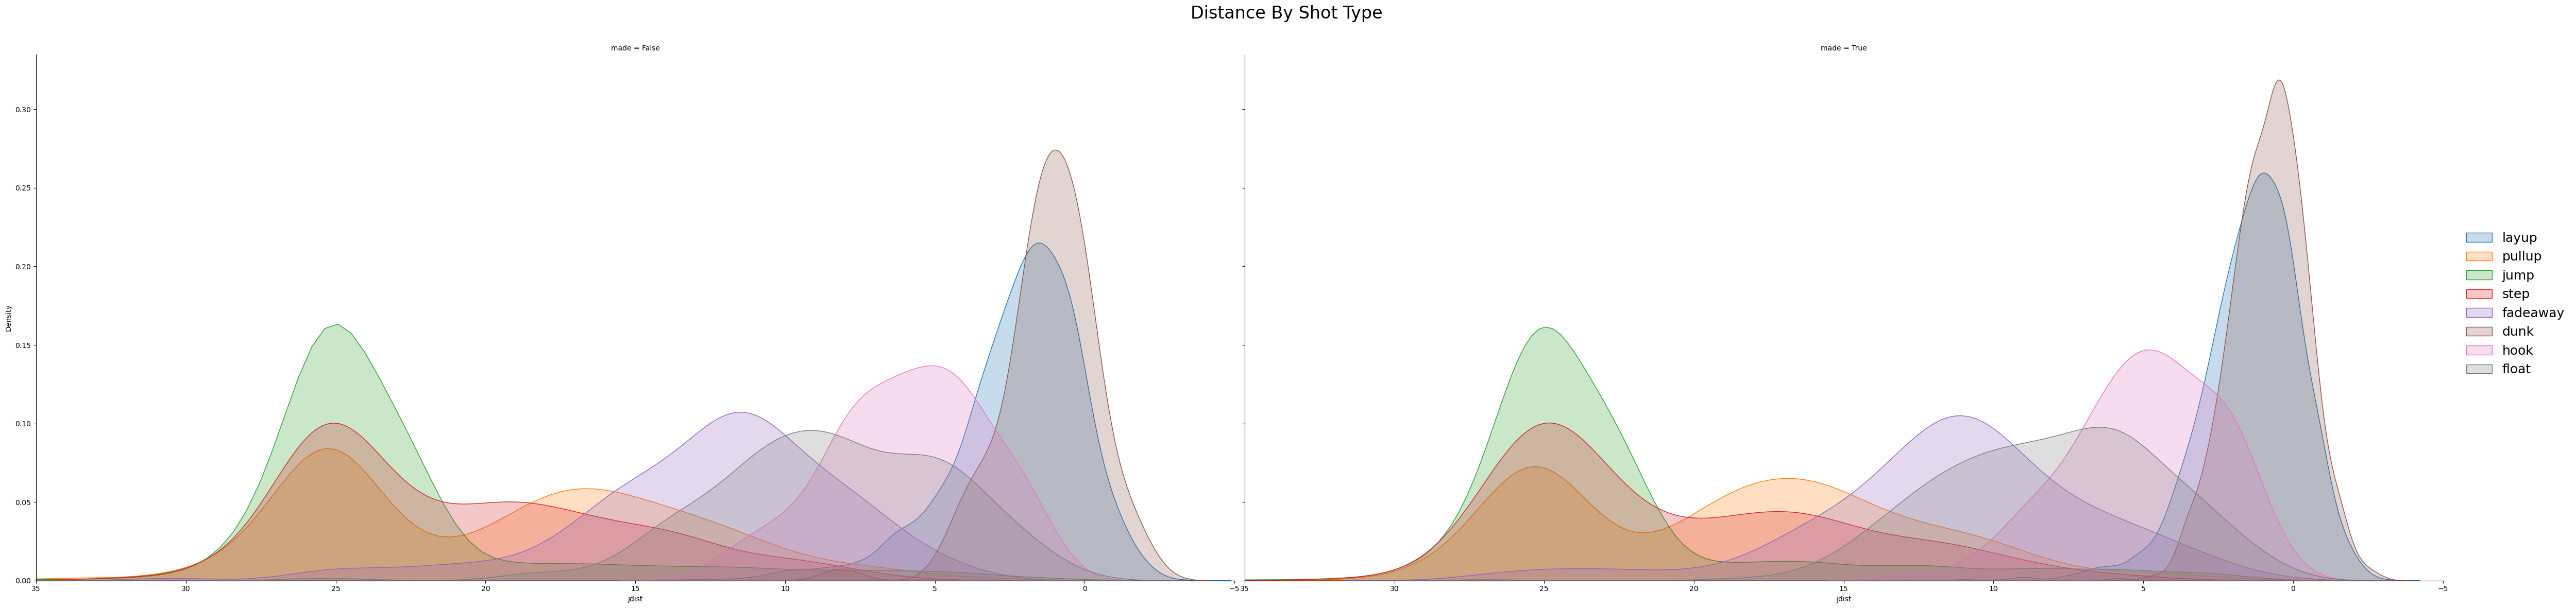

In [19]:
g = (sns.FacetGrid(dfs, hue='shot_type', col='made', height=12, aspect=2)
     .map(sns.kdeplot, 'jdist', shade=True))

g.fig.suptitle('Distance By Shot Type', fontsize=24)
g.fig.subplots_adjust(top=0.9)
g.set(xlim=(-5, 35))
[ax[0].invert_xaxis() for ax in g.axes]
g.add_legend(title="", fontsize=18)

plt.show()

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

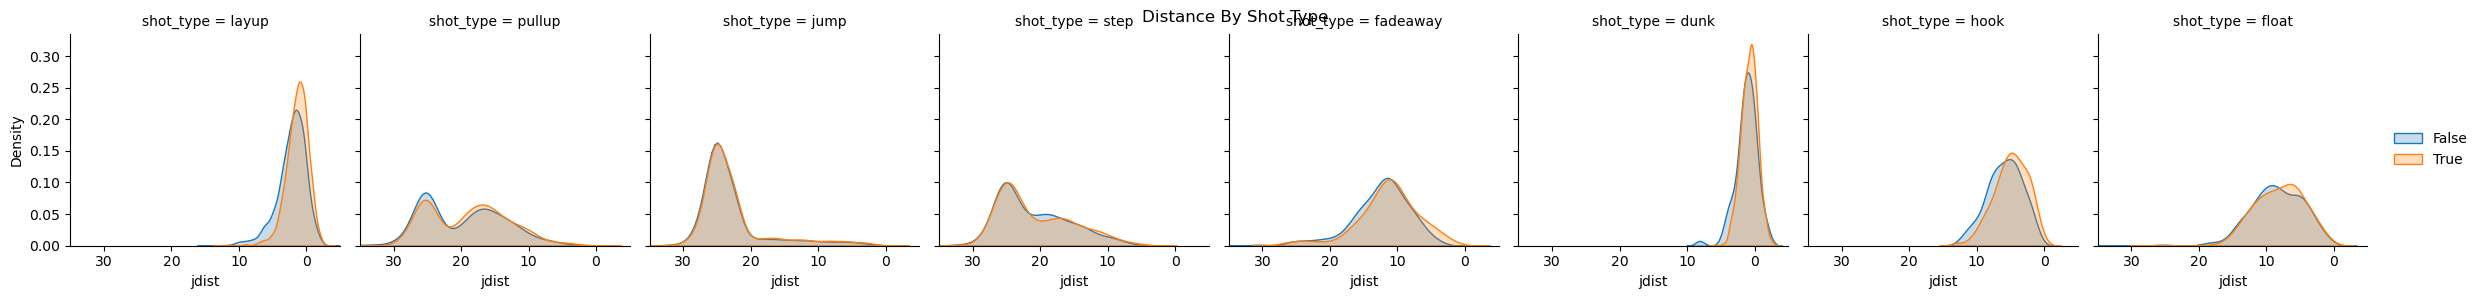

In [20]:
g = (sns.FacetGrid(dfs, hue='made', col='shot_type')
     .map(sns.kdeplot, 'jdist', shade=True))

g.fig.suptitle('Distance By Shot Type')
g.fig.subplots_adjust(top=0.9)
g.set(xlim=(-5, 35))
[ax[0].invert_xaxis() for ax in g.axes]
g.add_legend(title="")

plt.show()

## Manipulating data for seaborn

In [21]:
dfg[['date', 'home_team', 'away_team', 'home_pts', 'away_pts']].head()

date home_team away_team  home_pts  away_pts
0  2019-10-22       TOR       NOP       130       122
1  2019-10-22       LAC       LAL       112       102
2  2019-10-23       CHA       CHI       126       125
3  2019-10-23       IND       DET       110       119
4  2019-10-23       ORL       CLE        94        85

In [22]:
def home_away_pts_df(df, location):
    df = df[['date', f'{location}_team', f'{location}_pts']]
    df.columns = ['date', 'team', 'pts']
    df['location'] = location
    return df

home_away_pts_df(dfg, 'home').head()

C:\Users\Maintenant pret\AppData\Local\Temp\ipykernel_33292\664773708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = location


date team  pts location
0  2019-10-22  TOR  130     home
1  2019-10-22  LAC  112     home
2  2019-10-23  CHA  126     home
3  2019-10-23  IND  110     home
4  2019-10-23  ORL   94     home

In [23]:
home_away_pts_df(dfg, 'away').head()

C:\Users\Maintenant pret\AppData\Local\Temp\ipykernel_33292\664773708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = location


date team  pts location
0  2019-10-22  NOP  122     away
1  2019-10-22  LAL  102     away
2  2019-10-23  CHI  125     away
3  2019-10-23  DET  119     away
4  2019-10-23  CLE   85     away

In [24]:
pts_long = pd.concat([
    home_away_pts_df(dfg, loc) for loc in ['home', 'away']
], ignore_index=True)

pts_long.sample(10)

C:\Users\Maintenant pret\AppData\Local\Temp\ipykernel_33292\664773708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = location
C:\Users\Maintenant pret\AppData\Local\Temp\ipykernel_33292\664773708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = location


date team  pts location
101   2019-11-05  DEN  109     home
2113  2020-08-13  SAS  112     away
794   2020-02-10  TOR  137     home
69    2019-11-01  IND  102     home
134   2019-11-10  OKC  119     home
1520  2019-12-26  MEM  110     away
1792  2020-02-01  UTA  107     away
752   2020-02-04  LAL  129     home
609   2020-01-15  DEN  100     home
1555  2019-12-31  BOS  109     away

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


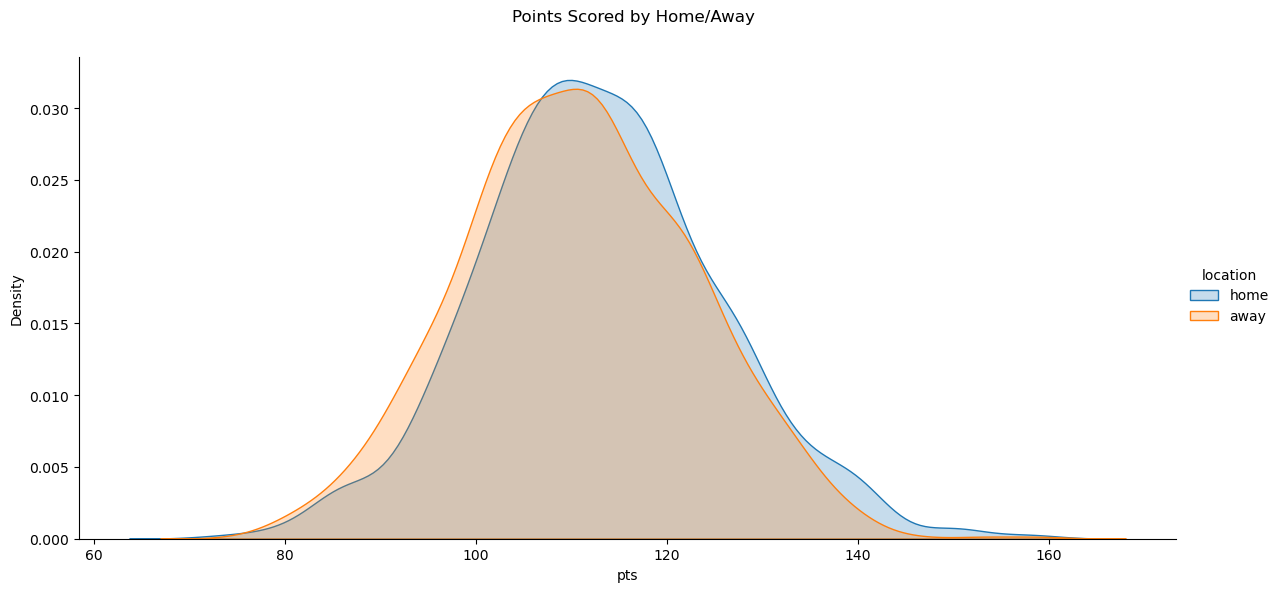

In [25]:
g = (sns.FacetGrid(pts_long, hue='location', height=6, aspect=2)
     .map(sns.kdeplot, 'pts', shade=True))

g.fig.suptitle('Points Scored by Home/Away')
g.fig.subplots_adjust(top=0.9)
g.add_legend(title="location")

plt.show()

#### Extended Example: Game to team-game - all-stats

In [26]:
location = 'home'
opp = 'away'

team_cols = [x for x in dfg.columns if x.startswith(location)]
team_cols

['home_team',
 'home_pts',
 'home_fgm',
 'home_fga',
 'home_fg_pct',
 'home_fg3m',
 'home_fg3a',
 'home_fg3_pct',
 'home_ftm',
 'home_fta',
 'home_ft_pct',
 'home_oreb',
 'home_dreb',
 'home_reb',
 'home_ast',
 'home_stl',
 'home_blk',
 'home_tov',
 'home_pf',
 'home_plus_minus']

In [27]:
opp_cols = [x for x in dfg.columns if x.startswith(opp)]
opp_cols

['away_team',
 'away_pts',
 'away_fgm',
 'away_fga',
 'away_fg_pct',
 'away_fg3m',
 'away_fg3a',
 'away_fg3_pct',
 'away_ftm',
 'away_fta',
 'away_ft_pct',
 'away_oreb',
 'away_dreb',
 'away_reb',
 'away_ast',
 'away_stl',
 'away_blk',
 'away_tov',
 'away_pf',
 'away_plus_minus']

In [28]:
df_team = dfg[team_cols]
df_team.head()

home_team  home_pts  home_fgm  home_fga  home_fg_pct  home_fg3m  home_fg3a  \
0       TOR       130        42       103        0.408         14         40   
1       LAC       112        42        81        0.519         11         31   
2       CHA       126        45        88        0.511         23         44   
3       IND       110        41        89        0.461          8         21   
4       ORL        94        37        86        0.430          9         30   

   home_fg3_pct  home_ftm  home_fta  home_ft_pct  home_oreb  home_dreb  \
0         0.350        32        38        0.842         16         41   
1         0.355        17        24        0.708         11         34   
2         0.523        13        16        0.813          9         32   
3         0.381        20        24        0.833         10         26   
4         0.300        11        19        0.579          7         39   

   home_reb  home_ast  home_stl  home_blk  home_tov  home_pf  home_plus_minus  
0        57        23         7         3        16       24              8.0  
1        45        24         8         5        14       25             10.0  
2        41        28         3         4        19       18              1.0  
3        36        26         8         6        15       28             -9.0  
4        46        24        12         4        13       18              9.0

In [29]:
df_team.columns = [x.replace(f'{location}_', '') for x in
                  df_team.columns]
df_team.head()

team  pts  fgm  fga  fg_pct  fg3m  fg3a  fg3_pct  ftm  fta  ft_pct  oreb  \
0  TOR  130   42  103   0.408    14    40    0.350   32   38   0.842    16   
1  LAC  112   42   81   0.519    11    31    0.355   17   24   0.708    11   
2  CHA  126   45   88   0.511    23    44    0.523   13   16   0.813     9   
3  IND  110   41   89   0.461     8    21    0.381   20   24   0.833    10   
4  ORL   94   37   86   0.430     9    30    0.300   11   19   0.579     7   

   dreb  reb  ast  stl  blk  tov  pf  plus_minus  
0    41   57   23    7    3   16  24         8.0  
1    34   45   24    8    5   14  25        10.0  
2    32   41   28    3    4   19  18         1.0  
3    26   36   26    8    6   15  28        -9.0  
4    39   46   24   12    4   13  18         9.0

In [30]:
df_opp = dfg[opp_cols]
df_opp.head()

away_team  away_pts  away_fgm  away_fga  away_fg_pct  away_fg3m  away_fg3a  \
0       NOP       122        43       102        0.422         19         45   
1       LAL       102        37        85        0.435         13         33   
2       CHI       125        49       105        0.467          9         30   
3       DET       119        41        78        0.526         11         24   
4       CLE        85        33        88        0.375          9         34   

   away_fg3_pct  away_ftm  away_fta  away_ft_pct  away_oreb  away_dreb  \
0         0.422        17        20        0.850         16         37   
1         0.394        15        21        0.714          9         32   
2         0.300        18        22        0.818         20         29   
3         0.458        26        33        0.788         10         35   
4         0.265        10        15        0.667         10         44   

   away_reb  away_ast  away_stl  away_blk  away_tov  away_pf  away_plus_minus  
0        53        30         4         9        19       34             -8.0  
1        41        20         4         7        14       24            -10.0  
2        49        25        11         4        10       20             -1.0  
3        45        26         5         6        18       21              9.0  
4        54        20         8         2        16       15             -9.0

In [31]:
df_opp.columns = [x.replace(opp, 'opp') for x in
                  df_opp.columns]
df_opp.head()

opp_team  opp_pts  opp_fgm  opp_fga  opp_fg_pct  opp_fg3m  opp_fg3a  \
0      NOP      122       43      102       0.422        19        45   
1      LAL      102       37       85       0.435        13        33   
2      CHI      125       49      105       0.467         9        30   
3      DET      119       41       78       0.526        11        24   
4      CLE       85       33       88       0.375         9        34   

   opp_fg3_pct  opp_ftm  opp_fta  opp_ft_pct  opp_oreb  opp_dreb  opp_reb  \
0        0.422       17       20       0.850        16        37       53   
1        0.394       15       21       0.714         9        32       41   
2        0.300       18       22       0.818        20        29       49   
3        0.458       26       33       0.788        10        35       45   
4        0.265       10       15       0.667        10        44       54   

   opp_ast  opp_stl  opp_blk  opp_tov  opp_pf  opp_plus_minus  
0       30        4        9       19      34            -8.0  
1       20        4        7       14      24           -10.0  
2       25       11        4       10      20            -1.0  
3       26        5        6       18      21             9.0  
4       20        8        2       16      15            -9.0

In [32]:
dfg_wide = pd.concat([df_team, df_opp], axis=1)
dfg_wide.head()

team  pts  fgm  fga  fg_pct  fg3m  fg3a  fg3_pct  ftm  fta  ...  opp_ft_pct  \
0  TOR  130   42  103   0.408    14    40    0.350   32   38  ...       0.850   
1  LAC  112   42   81   0.519    11    31    0.355   17   24  ...       0.714   
2  CHA  126   45   88   0.511    23    44    0.523   13   16  ...       0.818   
3  IND  110   41   89   0.461     8    21    0.381   20   24  ...       0.788   
4  ORL   94   37   86   0.430     9    30    0.300   11   19  ...       0.667   

   opp_oreb  opp_dreb  opp_reb  opp_ast  opp_stl  opp_blk  opp_tov  opp_pf  \
0        16        37       53       30        4        9       19      34   
1         9        32       41       20        4        7       14      24   
2        20        29       49       25       11        4       10      20   
3        10        35       45       26        5        6       18      21   
4        10        44       54       20        8        2       16      15   

   opp_plus_minus  
0            -8.0  
1           -10.0  
2            -1.0  
3             9.0  
4            -9.0  

[5 rows x 40 columns]

In [33]:
dfg_wide.shape

(1059, 40)

In [34]:
# now we want same df for away teams

def home_away_all(df, location):
    if location == 'home':
        opp = 'away'
    elif location == 'away':
        opp = 'home'
        
    team_cols = [x for x in df.columns if x.startswith(location)]
    
    opp_cols = [x for x in df.columns if x.startswith(opp)]
    
    df_team = df[team_cols]
    df_team.columns = [x.replace(f'{location}_', '') for x in df_team.columns]
    
    df_opp = df[opp_cols]
    df_opp.columns = [x.replace(opp, 'opp') for x in df_opp.columns]
    
    return pd.concat([df_team, df_opp], axis=1)

In [35]:
home_away_all(dfg, 'away').head()

team  pts  fgm  fga  fg_pct  fg3m  fg3a  fg3_pct  ftm  fta  ...  opp_ft_pct  \
0  NOP  122   43  102   0.422    19    45    0.422   17   20  ...       0.842   
1  LAL  102   37   85   0.435    13    33    0.394   15   21  ...       0.708   
2  CHI  125   49  105   0.467     9    30    0.300   18   22  ...       0.813   
3  DET  119   41   78   0.526    11    24    0.458   26   33  ...       0.833   
4  CLE   85   33   88   0.375     9    34    0.265   10   15  ...       0.579   

   opp_oreb  opp_dreb  opp_reb  opp_ast  opp_stl  opp_blk  opp_tov  opp_pf  \
0        16        41       57       23        7        3       16      24   
1        11        34       45       24        8        5       14      25   
2         9        32       41       28        3        4       19      18   
3        10        26       36       26        8        6       15      28   
4         7        39       46       24       12        4       13      18   

   opp_plus_minus  
0             8.0  
1            10.0  
2             1.0  
3            -9.0  
4             9.0  

[5 rows x 40 columns]

In [36]:
home_away_all(dfg, 'away').shape

(1059, 40)

In [37]:
dfg_wide = pd.concat([home_away_all(dfg, 'home'), 
                      home_away_all(dfg, 'away')])
dfg_wide.head()

team  pts  fgm  fga  fg_pct  fg3m  fg3a  fg3_pct  ftm  fta  ...  opp_ft_pct  \
0  TOR  130   42  103   0.408    14    40    0.350   32   38  ...       0.850   
1  LAC  112   42   81   0.519    11    31    0.355   17   24  ...       0.714   
2  CHA  126   45   88   0.511    23    44    0.523   13   16  ...       0.818   
3  IND  110   41   89   0.461     8    21    0.381   20   24  ...       0.788   
4  ORL   94   37   86   0.430     9    30    0.300   11   19  ...       0.667   

   opp_oreb  opp_dreb  opp_reb  opp_ast  opp_stl  opp_blk  opp_tov  opp_pf  \
0        16        37       53       30        4        9       19      34   
1         9        32       41       20        4        7       14      24   
2        20        29       49       25       11        4       10      20   
3        10        35       45       26        5        6       18      21   
4        10        44       54       20        8        2       16      15   

   opp_plus_minus  
0            -8.0  
1           -10.0  
2            -1.0  
3             9.0  
4            -9.0  

[5 rows x 40 columns]

In [38]:
dfg_wide.shape

(2118, 40)

In [39]:
# few cols not in home/away format

other_cols = [x for x in dfg.columns if not
             ((x.startswith('home')) or (x.startswith('away')))]

other_cols

['game_id', 'date', 'min', 'bubble', 'sample', 'season']

In [40]:
df_all = pd.concat([dfg_wide, dfg[other_cols]], axis=1)
df_all['win'] = dfg_wide['pts'] > dfg_wide['opp_pts']

df_all.head()

team  pts  fgm  fga  fg_pct  fg3m  fg3a  fg3_pct  ftm  fta  ...  opp_tov  \
0  TOR  130   42  103   0.408    14    40    0.350   32   38  ...       19   
1  LAC  112   42   81   0.519    11    31    0.355   17   24  ...       14   
2  CHA  126   45   88   0.511    23    44    0.523   13   16  ...       10   
3  IND  110   41   89   0.461     8    21    0.381   20   24  ...       18   
4  ORL   94   37   86   0.430     9    30    0.300   11   19  ...       16   

   opp_pf  opp_plus_minus   game_id        date  min  bubble  sample   season  \
0      34            -8.0  21900001  2019-10-22  265   False   False  2019-20   
1      24           -10.0  21900002  2019-10-22  239   False    True  2019-20   
2      20            -1.0  21900003  2019-10-23  240   False   False  2019-20   
3      21             9.0  21900004  2019-10-23  241   False   False  2019-20   
4      15            -9.0  21900005  2019-10-23  239   False   False  2019-20   

     win  
0   True  
1   True  
2   True  
3  False  
4   True  

[5 rows x 47 columns]

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

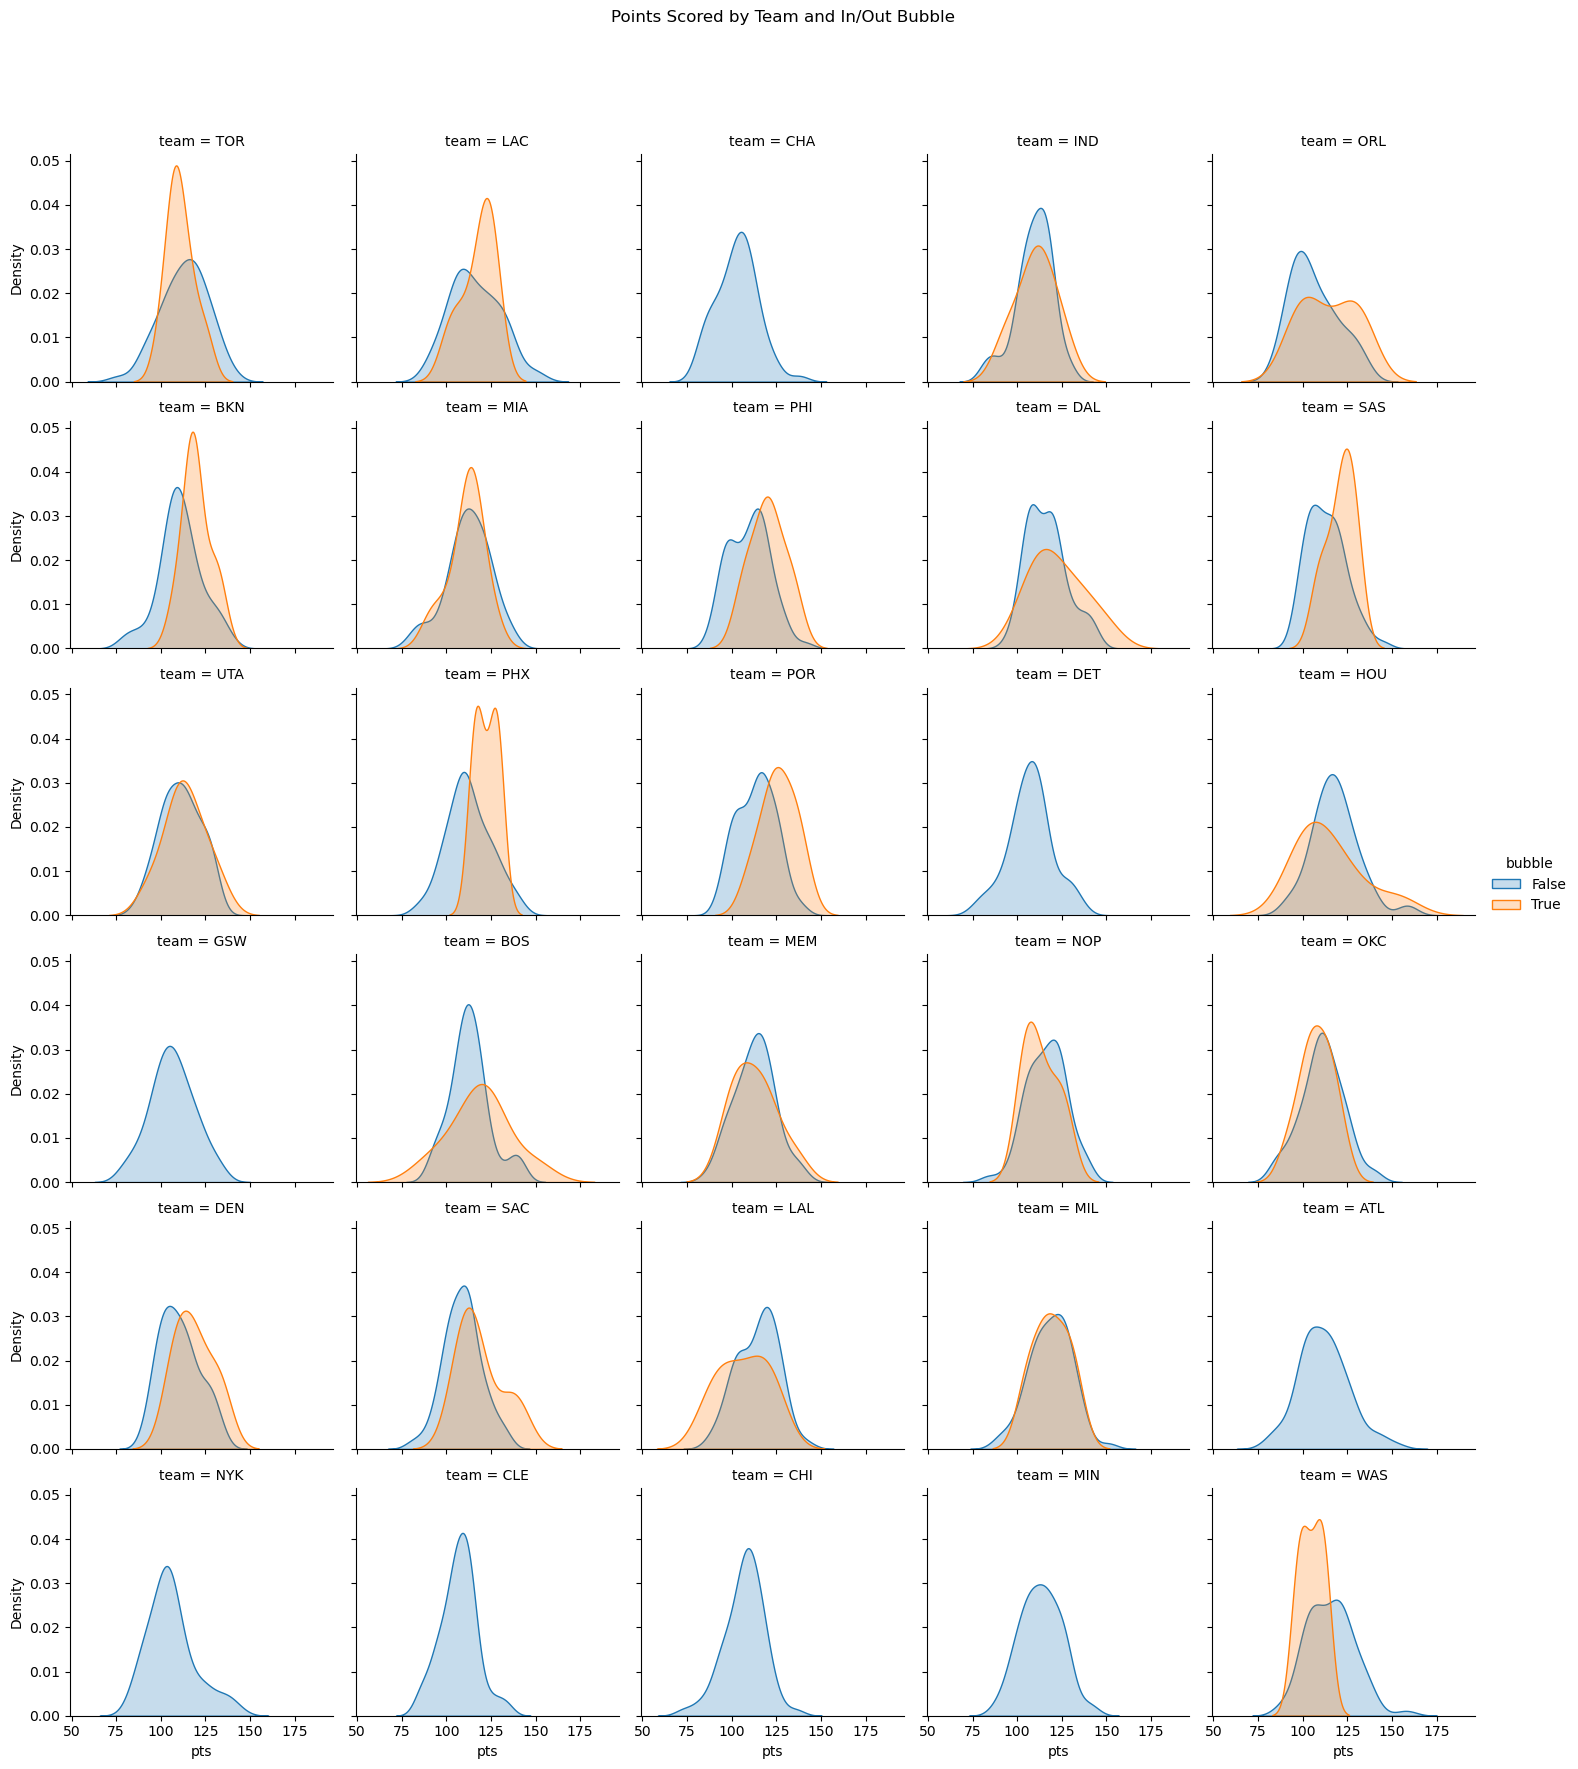

In [41]:
g = (sns.FacetGrid(df_all, hue='bubble', col='team', col_wrap=5)
     .map(sns.kdeplot, 'pts', shade=True))

g.fig.suptitle('Points Scored by Team and In/Out Bubble')
g.fig.subplots_adjust(top=0.9)
g.add_legend(title="bubble")

plt.show()

# Relationships Between Variables

## Scatter Plots

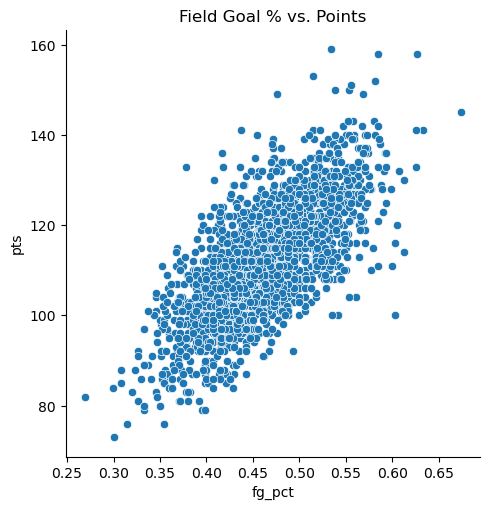

In [42]:
sns.relplot(x='fg_pct', y='pts', data=df_all)

# Set the title using Matplotlib
plt.title('Field Goal % vs. Points')

# Show the plot
plt.show()

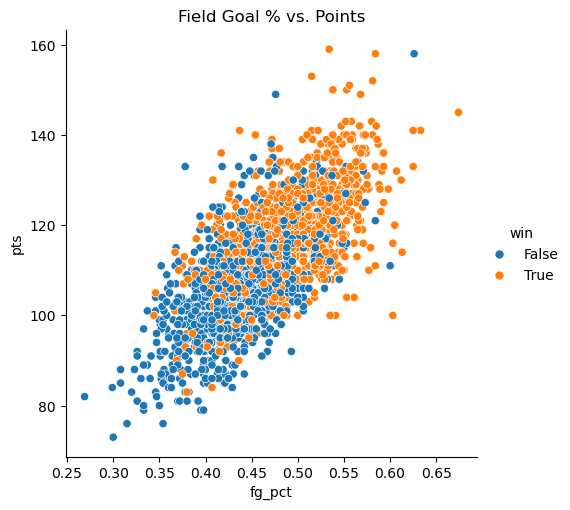

In [43]:
sns.relplot(x='fg_pct', y='pts', hue='win', data=df_all)

# Set the title using Matplotlib
plt.title('Field Goal % vs. Points')

# Show the plot
plt.show()

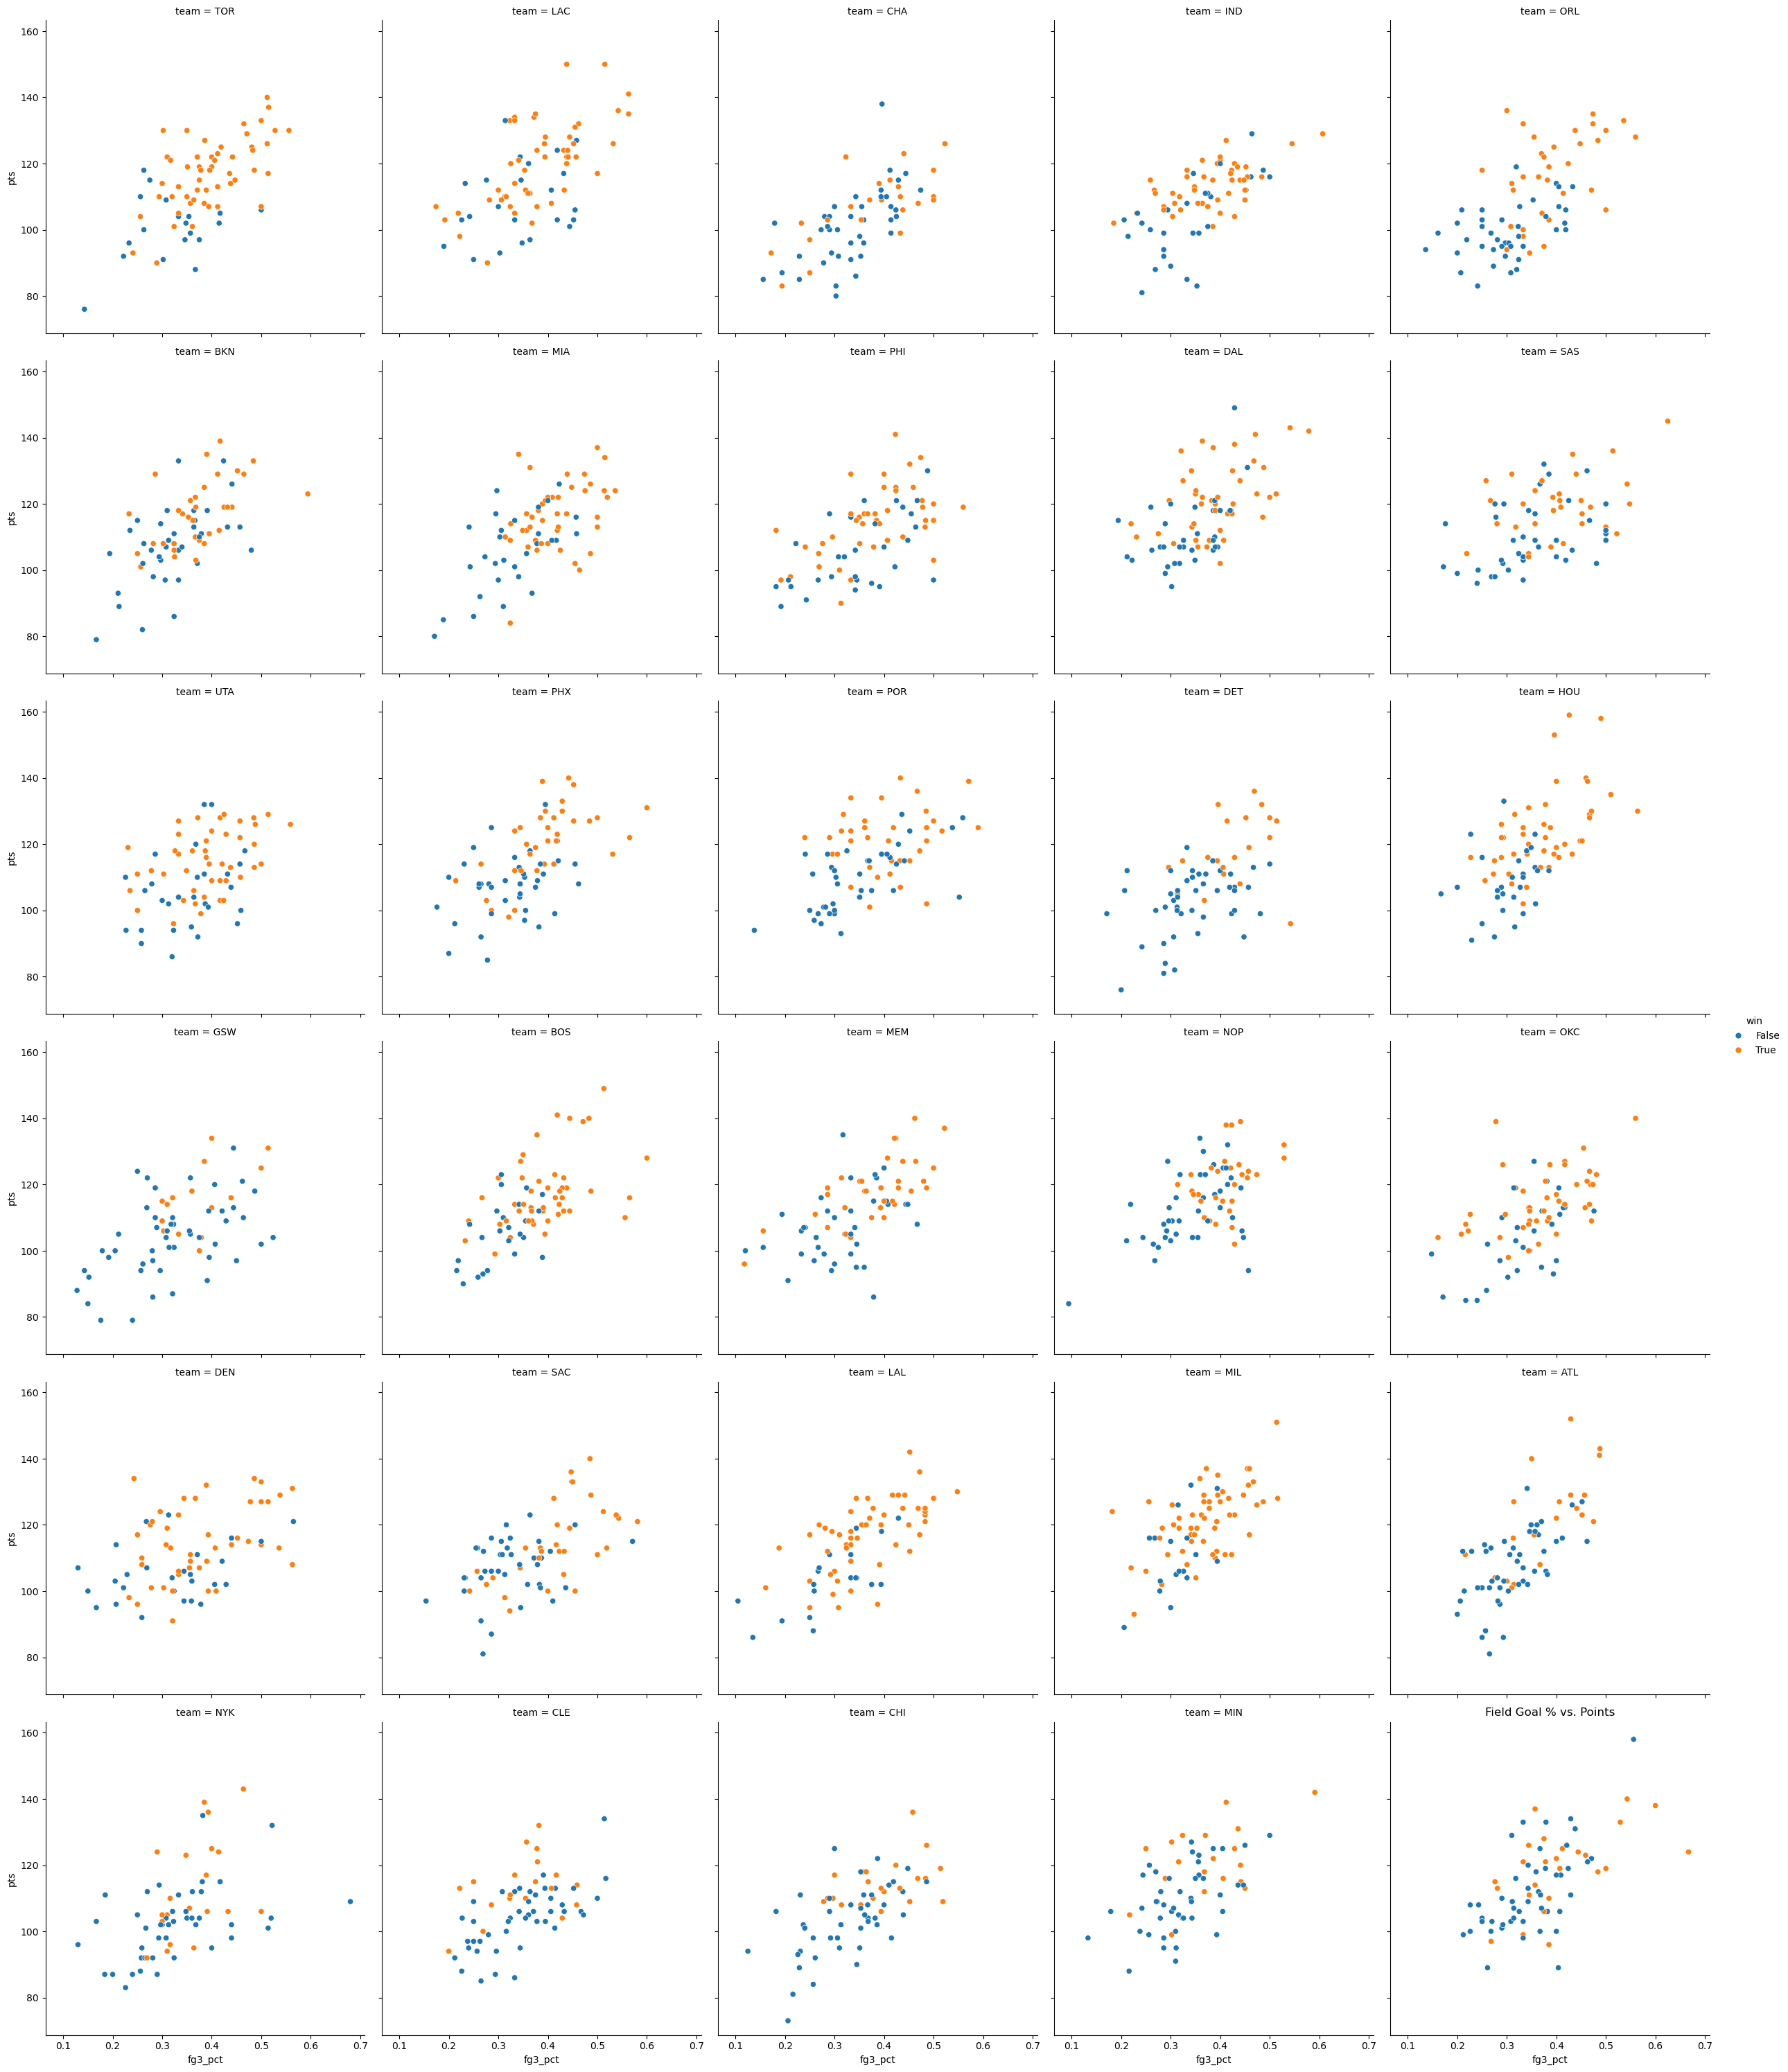

In [44]:
sns.relplot(x='fg3_pct', y='pts', col='team', 
            hue='win', col_wrap=5, data=df_all)

# Set the title using Matplotlib
plt.title('Field Goal % vs. Points')

# Show the plot
plt.show()

## Contour Plots

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


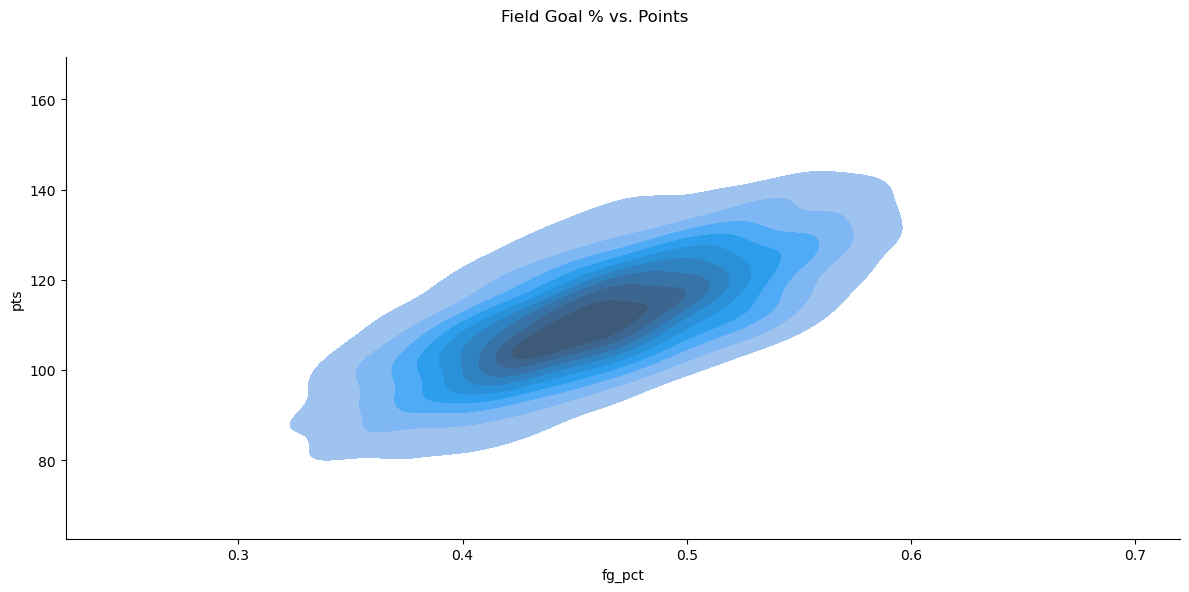

In [45]:
g = (sns.FacetGrid(df_all, height=6, aspect=2)
     .map(sns.kdeplot, 'fg_pct', 'pts', shade=True))

g.fig.suptitle('Field Goal % vs. Points')
g.fig.subplots_adjust(top=0.9)

plt.show()

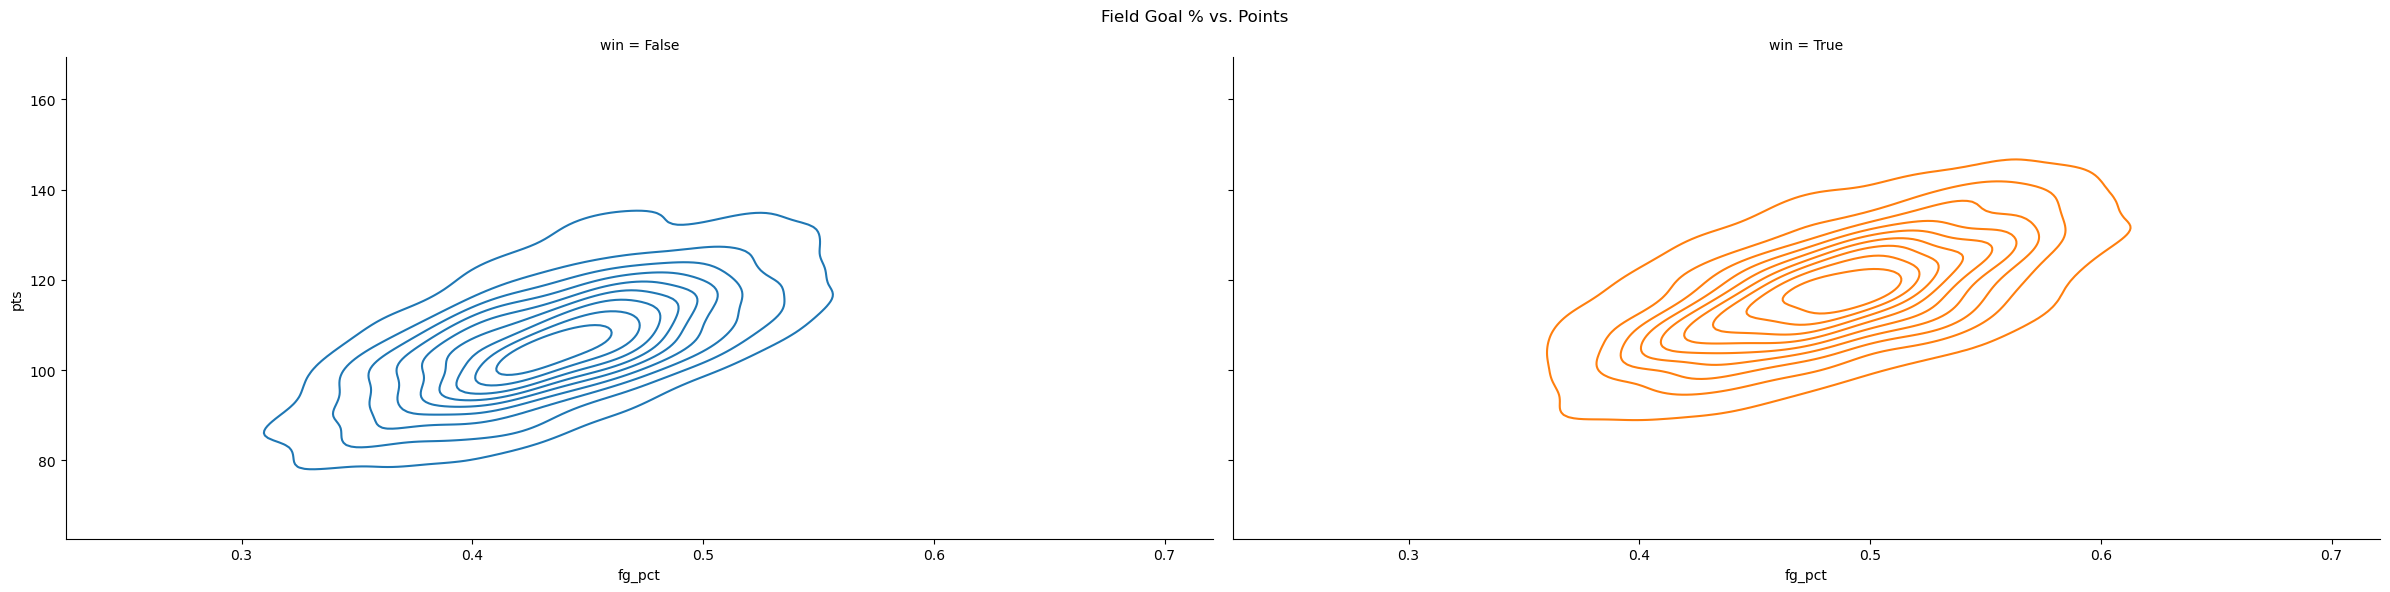

In [46]:
g = (sns.FacetGrid(df_all, hue='win', col='win', height=6, aspect=2)
     .map(sns.kdeplot, 'fg_pct', 'pts'))

g.fig.suptitle('Field Goal % vs. Points')
g.fig.subplots_adjust(top=0.9)

plt.show()

## Correlation

In [47]:
df_all[['pts', 'reb', 'ast', 'win', 'fg3_pct', 
        'fgm', 'blk', 'opp_fg3_pct']].corr().round(2)

pts   reb   ast   win  fg3_pct   fgm   blk  opp_fg3_pct
pts          1.00  0.11  0.51  0.46     0.55  0.83  0.06         0.06
reb          0.11  1.00 -0.01  0.32    -0.10  0.09  0.17        -0.34
ast          0.51 -0.01  1.00  0.25     0.41  0.58  0.04         0.04
win          0.46  0.32  0.25  1.00     0.34  0.39  0.17        -0.34
fg3_pct      0.55 -0.10  0.41  0.34     1.00  0.43  0.01         0.01
fgm          0.83  0.09  0.58  0.39     0.43  1.00  0.08         0.07
blk          0.06  0.17  0.04  0.17     0.01  0.08  1.00        -0.08
opp_fg3_pct  0.06 -0.34  0.04 -0.34     0.01  0.07 -0.08         1.00

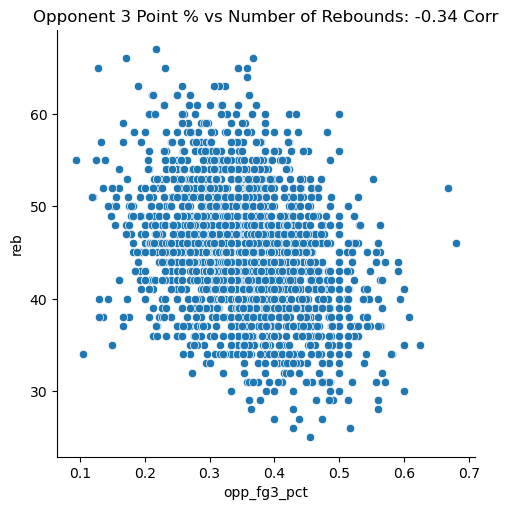

In [48]:
sns.relplot(x='opp_fg3_pct', y='reb', data=df_all)

# Set the title using Matplotlib
plt.title('Opponent 3 Point % vs Number of Rebounds: -0.34 Corr')

# Show the plot
plt.show()

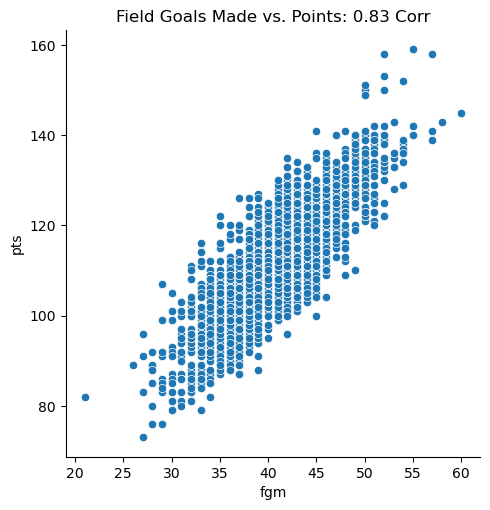

In [49]:
sns.relplot(x='fgm', y='pts', data=df_all)

# Set the title using Matplotlib
plt.title('Field Goals Made vs. Points: 0.83 Corr')

# Show the plot
plt.show()

## Line Plots

In [50]:
df_all = pd.merge(df_all, dft[['team', 'division', 'conference']])

In [51]:
df_all['month'] = df_all['date'].str[5:7].astype(int)
df_all['month'].sample(5)

369     12
1015     8
1093    10
293     12
790      2
Name: month, dtype: int32

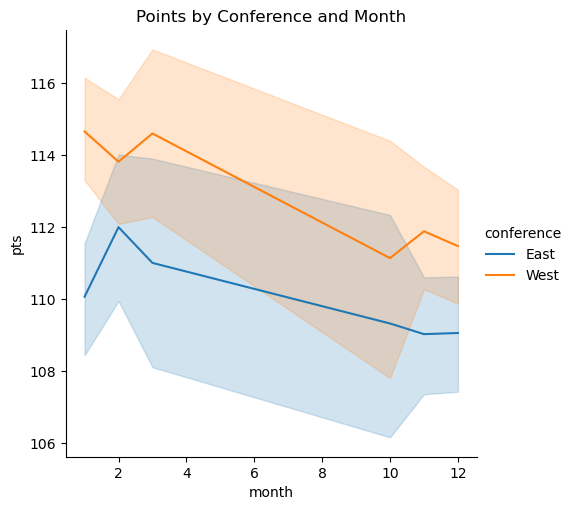

In [52]:
sns.relplot(x='month', y='pts', hue='conference', 
            kind='line', data=df_all.query("~bubble")) # filter to exclude where bubble is true

# Set the title using Matplotlib
plt.title('Points by Conference and Month')

# Show the plot
plt.show()

In [53]:
# Nov 2019, East Conf

df_all.loc[(df_all['month'] == 11) & (df_all['conference'] == 'East'),
          ['date', 'team', 'opp_team', 'pts', 'opp_pts', 'conference']].sort_values('date').head()

date team opp_team  pts  opp_pts conference
68  2019-11-01  BKN      HOU  123      116       East
69  2019-11-01  IND      CLE  102       95       East
70  2019-11-01  ORL      MIL   91      123       East
71  2019-11-01  BOS      NYK  104      102       East
72  2019-11-01  CHI      DET  112      106       East

In [54]:
max_pts = (df_all.query("~bubble").groupby(['conference', 'month'],
                                          as_index=False)['pts'].max())

max_pts.head()

conference  month  pts
0       East      1  152
1       East      2  141
2       East      3  143
3       East     10  158
4       East     11  140

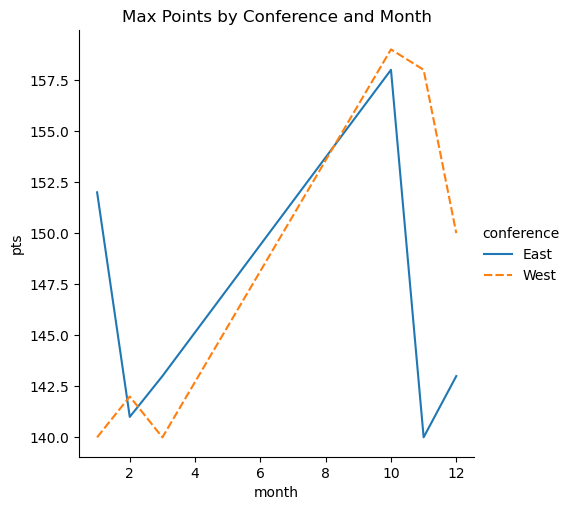

In [55]:
sns.relplot(x='month', y='pts', style='conference', 
            kind='line', data=max_pts, hue='conference')

# Set the title using Matplotlib
plt.title('Max Points by Conference and Month')

# Show the plot
plt.show()

## Plot Options

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

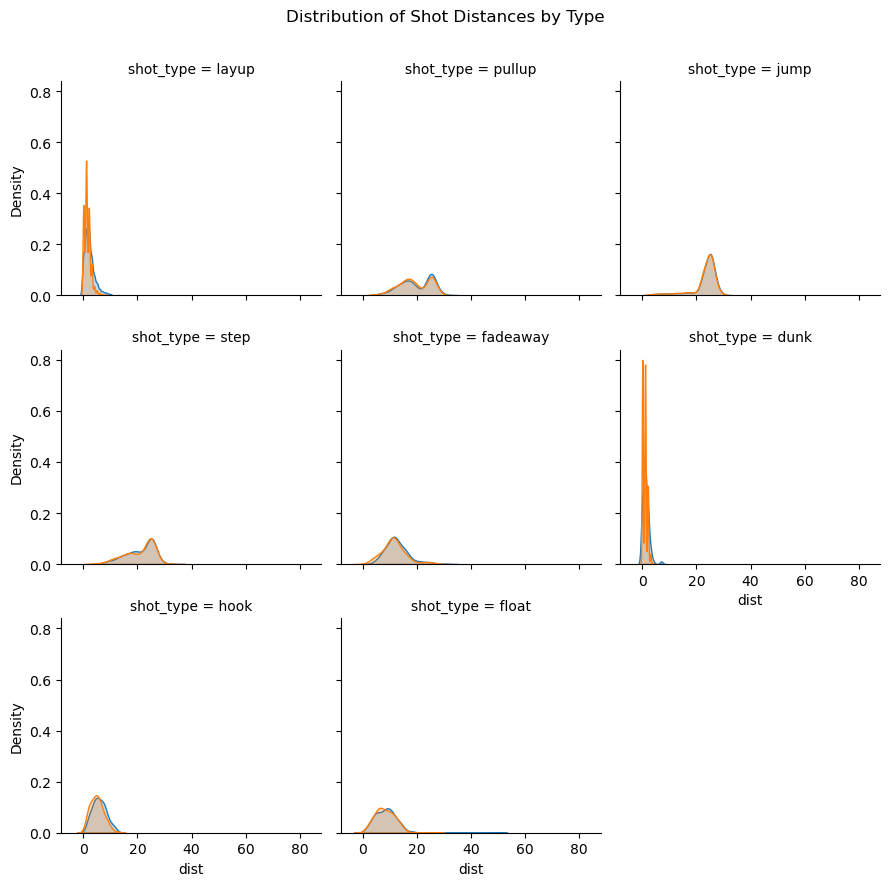

In [56]:
g = (sns.FacetGrid(dfs, col='shot_type', hue='made', col_wrap=3)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.subplots_adjust(top=0.9) # adding a title
g.fig.suptitle('Distribution of Shot Distances by Type')

plt.show()

### Modifying the axes

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

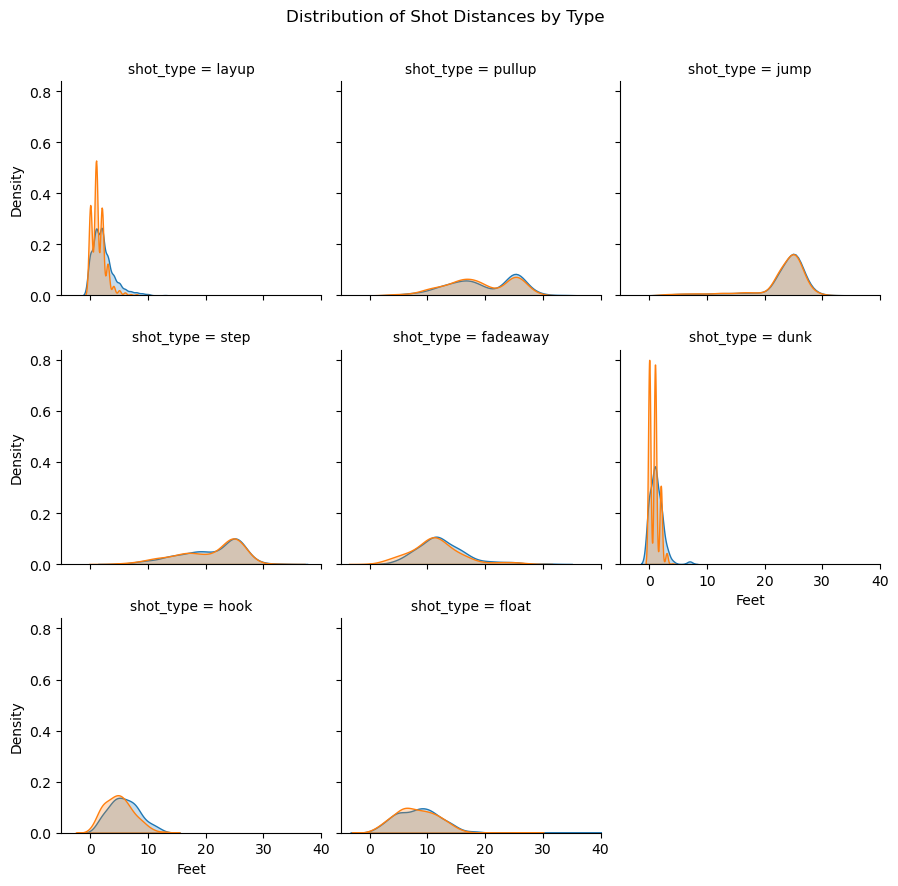

In [57]:
g = (sns.FacetGrid(dfs, col='shot_type', hue='made', col_wrap=3)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.subplots_adjust(top=0.9) # adding a title
g.fig.suptitle('Distribution of Shot Distances by Type')

g.set(xlim=(-5, 40))
g.set_xlabels('Feet')
g.set_ylabels('Density')

plt.show()

### Legend

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

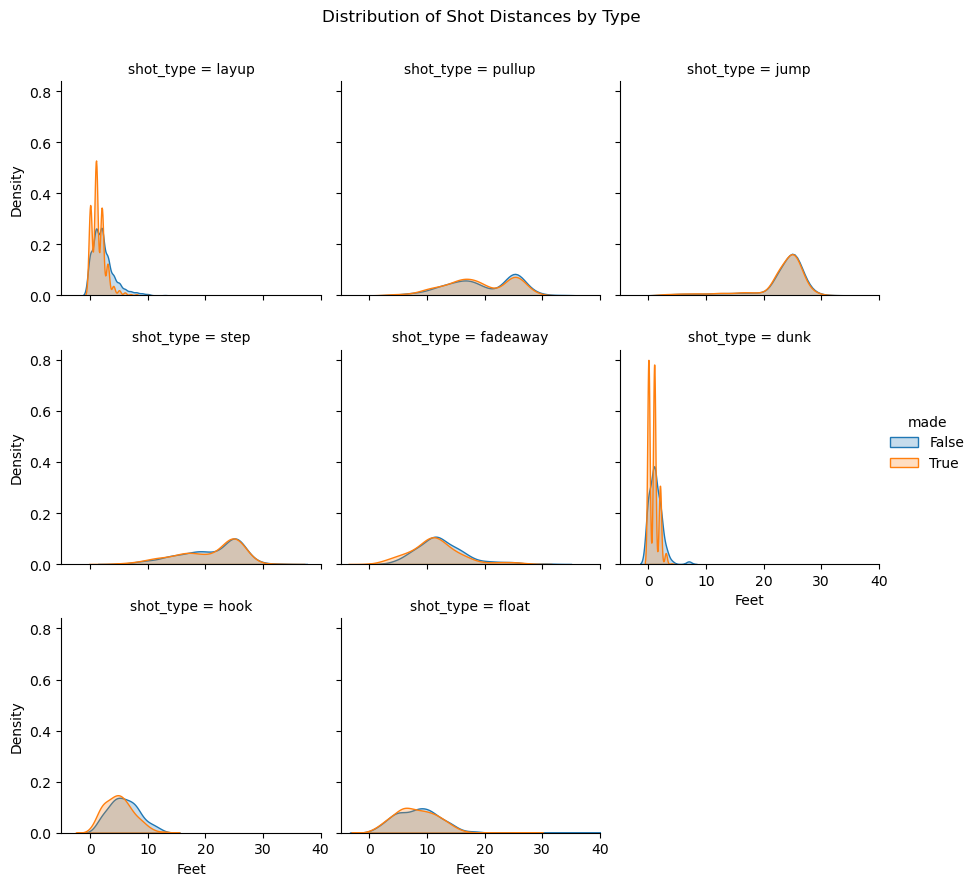

In [58]:
g = (sns.FacetGrid(dfs, col='shot_type', hue='made', col_wrap=3)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.subplots_adjust(top=0.9) # adding a title
g.fig.suptitle('Distribution of Shot Distances by Type')

g.set(xlim=(-5, 40))
g.set_xlabels('Feet')
g.set_ylabels('Density')

g.add_legend()

plt.show()

### Plot size

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

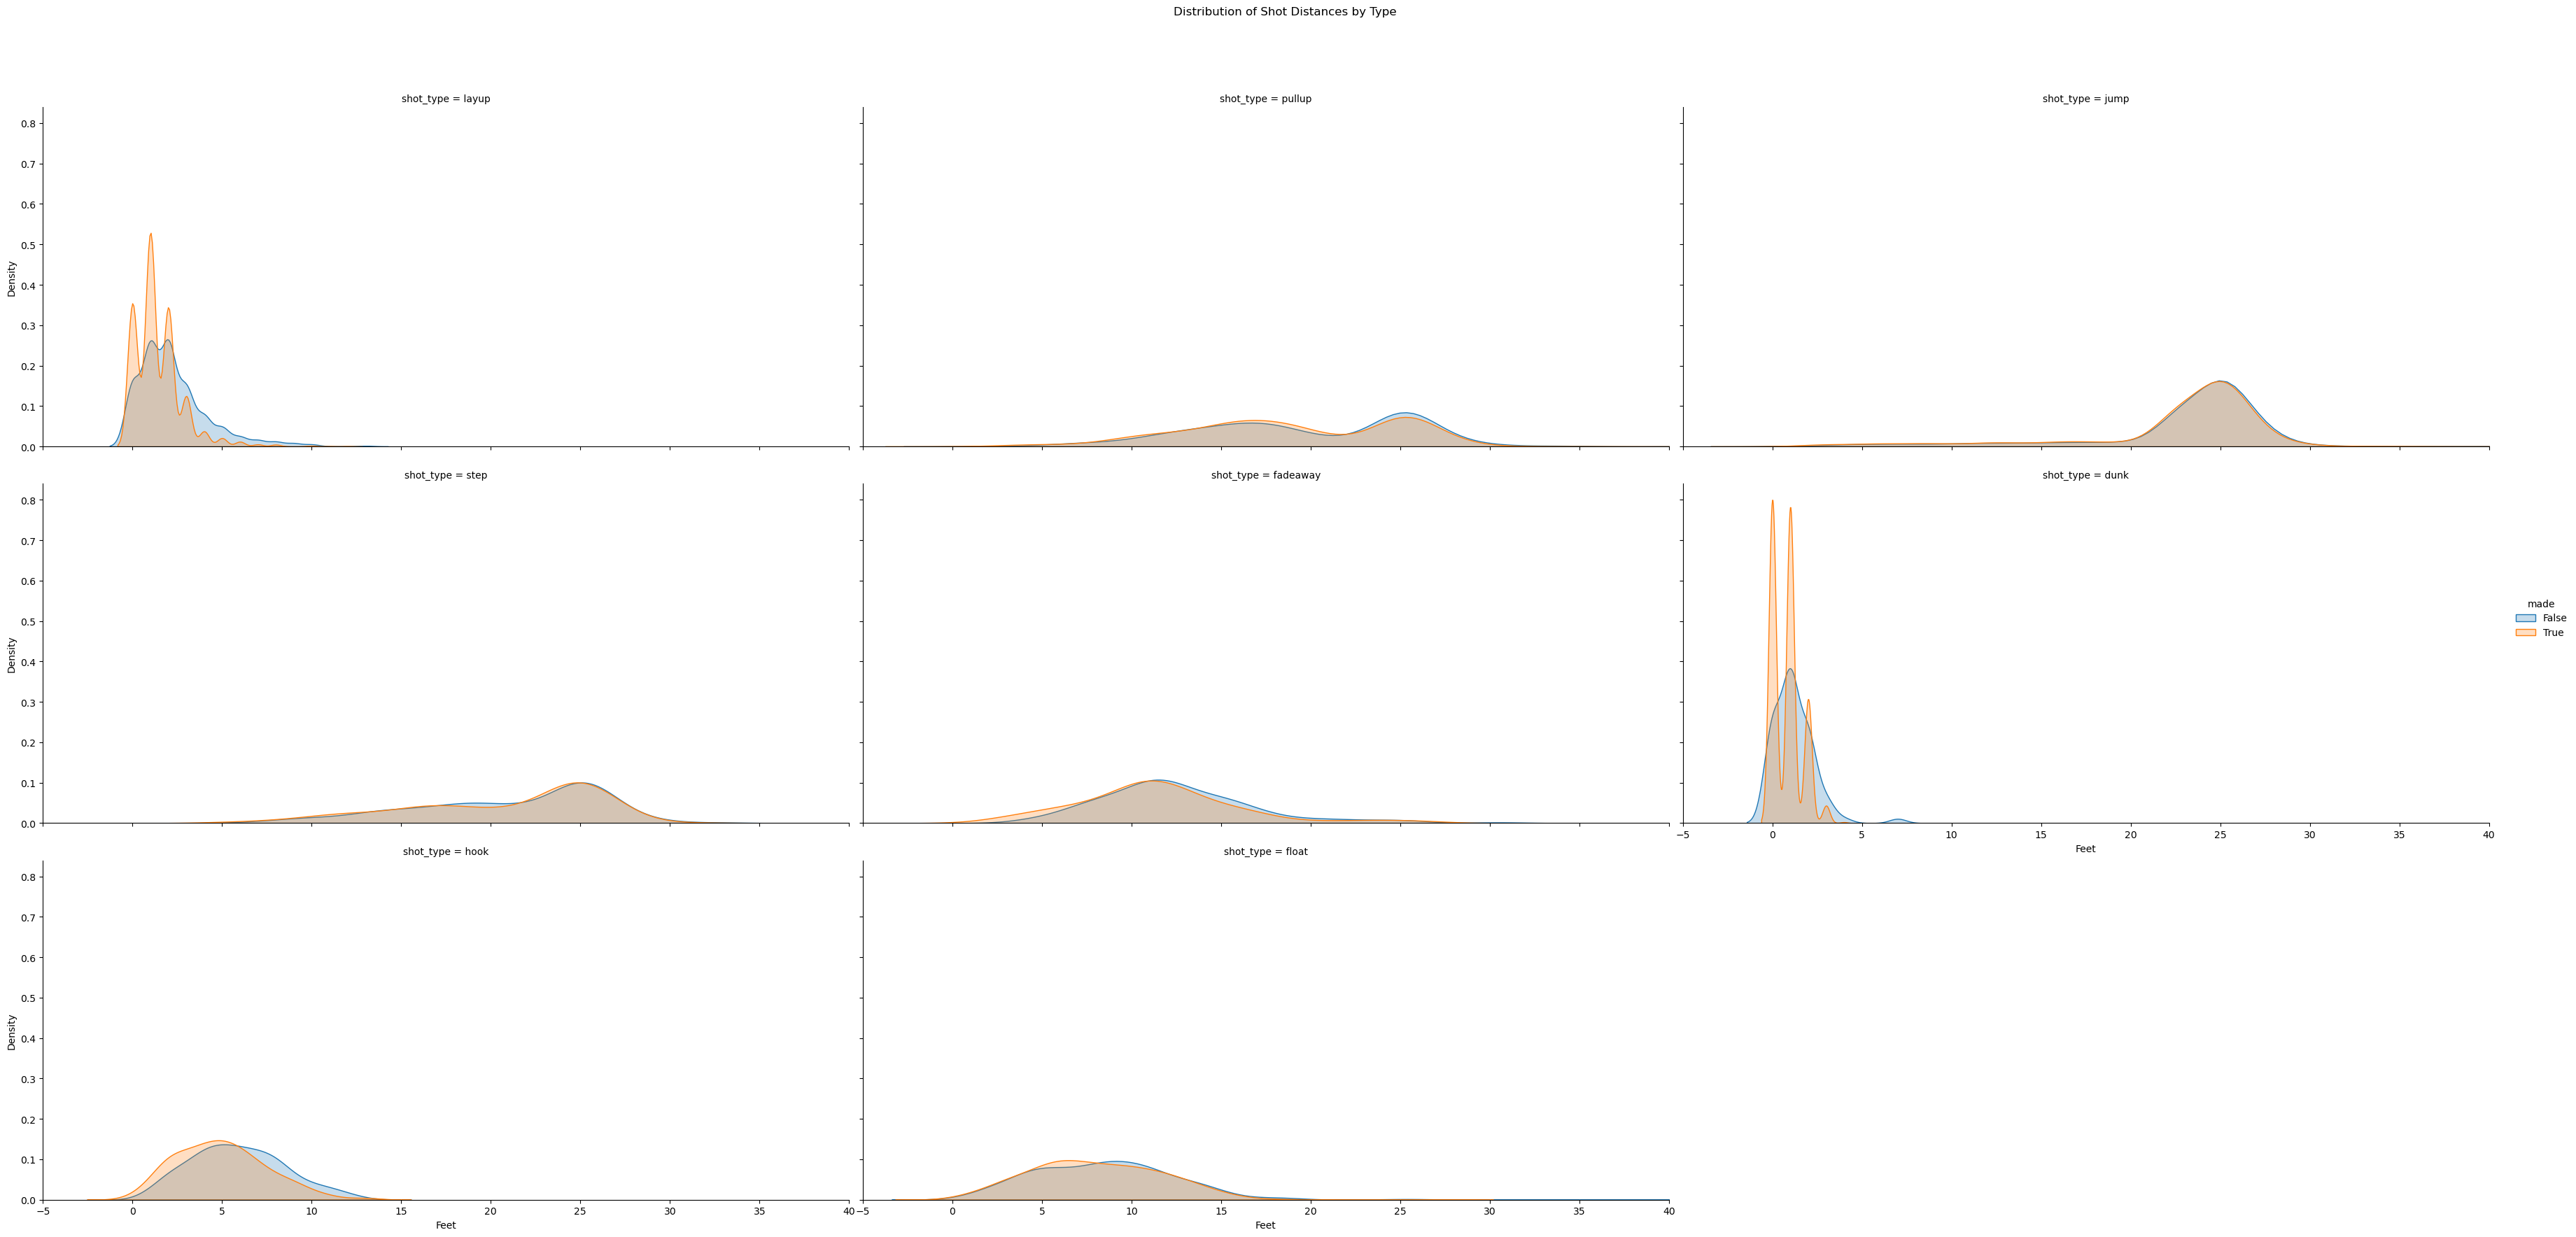

In [59]:
g = (sns.FacetGrid(dfs, col='shot_type', hue='made', col_wrap=3, height=6, aspect=2)
     .map(sns.kdeplot, 'dist', shade=True))

g.fig.subplots_adjust(top=0.9) # adding a title
g.fig.suptitle('Distribution of Shot Distances by Type')

g.set(xlim=(-5, 40))
g.set_xlabels('Feet')
g.set_ylabels('Density')

g.add_legend()

plt.show()

### Saving

In [60]:
g.savefig('shot_dist_type_made.png')

## Shot Charts

### Shot Charts As Seaborn Scatter Plots

In [61]:
dfs[['name', 'dist', 'value', 'made', 'x', 'y']].head()

# x and y are coordinates on 1/2 NBA court

name  dist  value   made    x    y
0     L. James     2      2   True   -9   23
1    L. Shamet    26      3  False  201  178
2     D. Green    25      3   True  125  221
3  P. Beverley    26      3  False  117  239
4     A. Davis    18      2  False   96  162

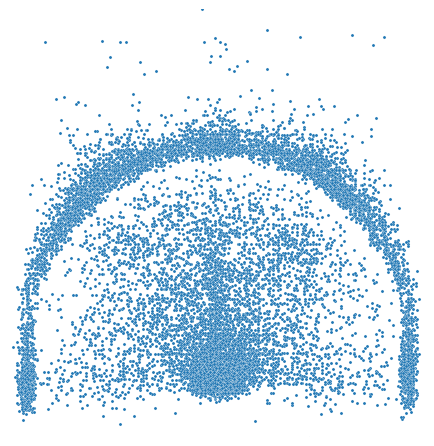

In [62]:
g = sns.relplot(data= dfs, x='x', y='y', kind='scatter', s=5)
# s controls the markers size

g.set(xlim=(-250, 250), ylim=(-50, 400), 
      xticks=[], yticks=[], xlabel=None, ylabel=None)
# xticks=[] Removes the x-axis ticks.

g.despine(left=True, bottom=True)
# despine Removes the spines (borders) of the plot.

plt.show()

### With NBA Court Background

In [63]:
import matplotlib.image as mpimg

map_img = mpimg.imread(r'C:\Users\Maintenant pret\OneDrive\Documents\Learn to Code With Basketball\code-basketball-files-main\data\nba_court.jpg')

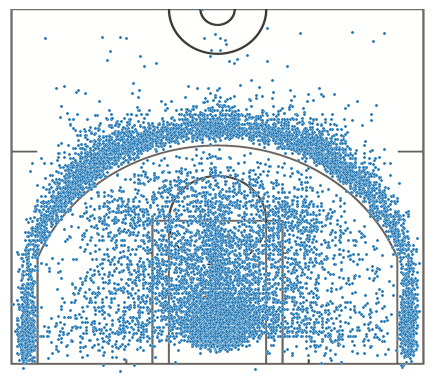

In [64]:
g = sns.relplot(data= dfs, x='x', y='y', kind='scatter', s=5)
# s controls the markers size

g.set(xlim=(-250, 250), ylim=(-50, 400), 
      xticks=[], yticks=[], xlabel=None, ylabel=None)
# xticks=[] Removes the x-axis ticks.

g.despine(left=True, bottom=True)
# despine Removes the spines (borders) of the plot.

for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[-250, 250, -30, 400])

plt.show()

### Function

In [65]:
def shot_chart(dfs, **kwargs):
    g = sns.relplot(data=dfs, x='x', y='y', kind='scatter', **kwargs)
    g.set(xlim=(-250, 250), ylim=(-30, 400), 
          xticks=[], yticks=[], xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)
    
    for ax in g.fig.axes:
        ax.imshow(map_img, zorder=0, extent=[-250, 250, -30, 400])
        
    return g

# kwargs** (keyword arguments) sorts of gobbles up extra arguments

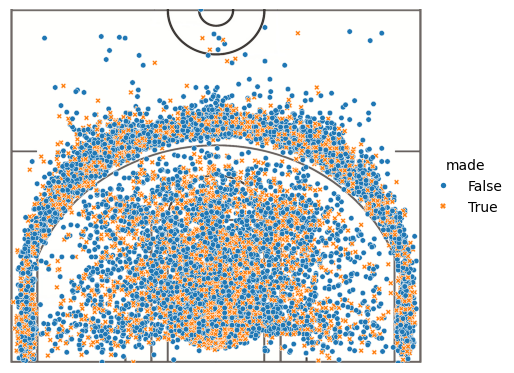

In [66]:
# shot_chart mostly wrapper around seaborn's relplot func.

g = shot_chart(dfs, hue='made', style='made', s=15)

plt.show()

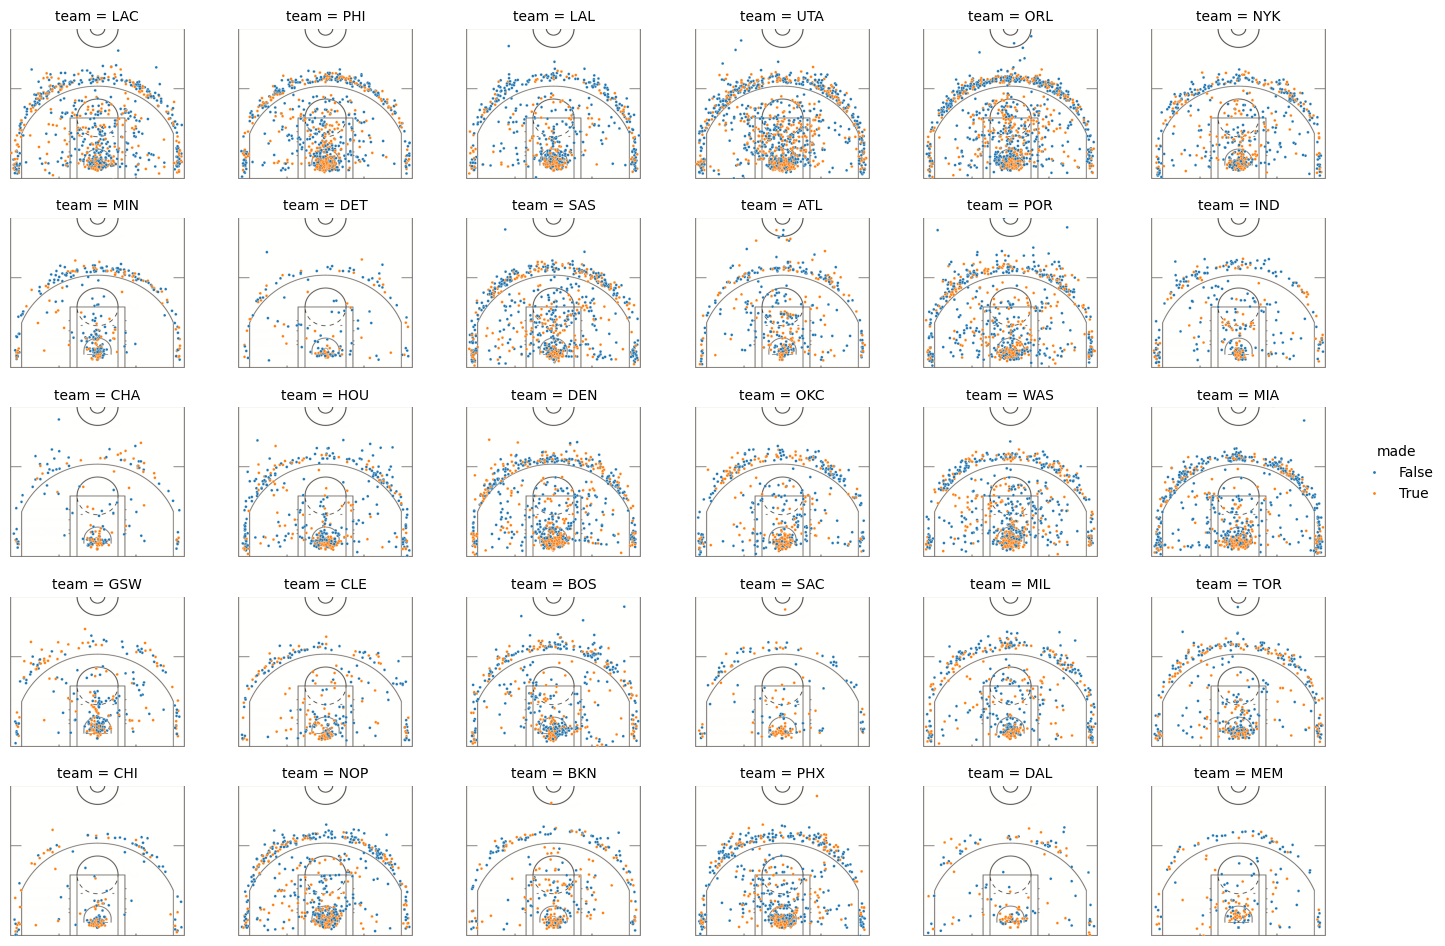

In [67]:
shot_chart(dfs, hue='made', col='team', col_wrap=6, 
           aspect=1.2, height=2, s=4)
plt.show()

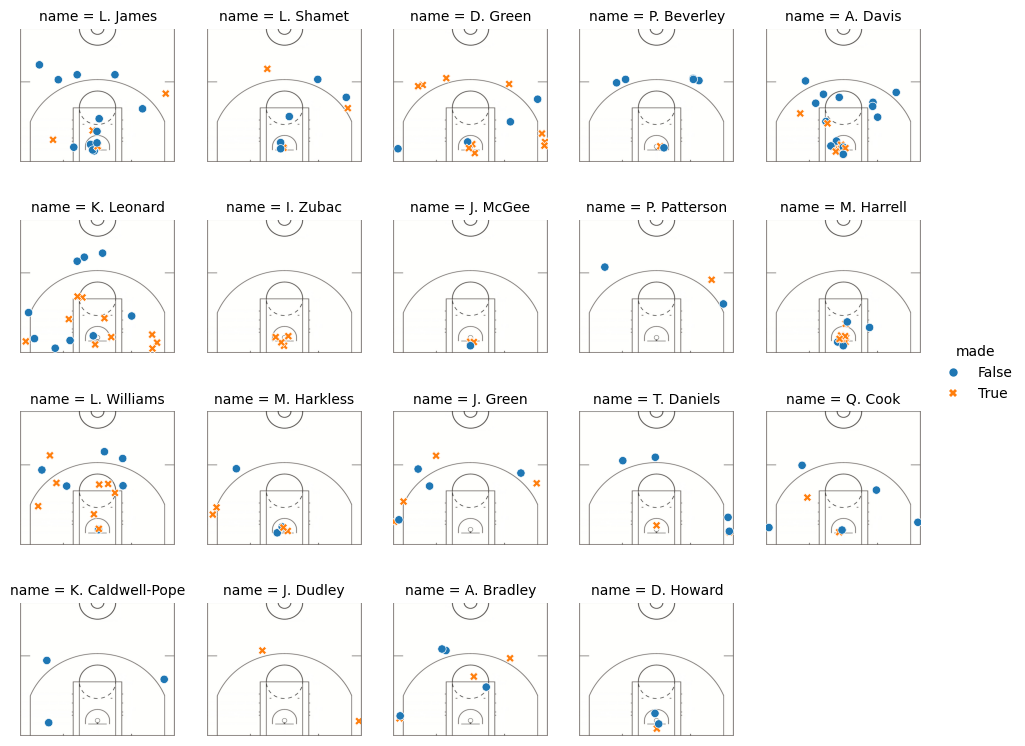

In [68]:
shot_chart(dfs.query("game_id == 21900002"), hue='made', style='made', 
           col='name', col_wrap=5, height=2)
plt.show()

### Contour Plots

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

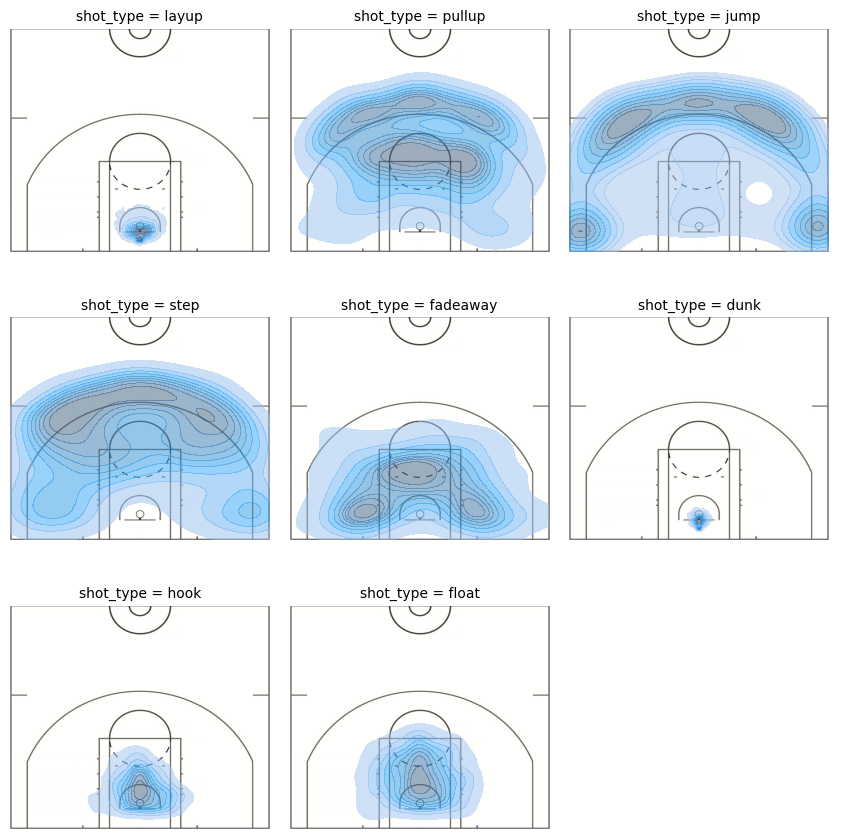

In [69]:
g = (sns.FacetGrid(dfs, col='shot_type', col_wrap=3)
    .map(sns.kdeplot, 'x', 'y', alpha=0.5, shade=True)
    .add_legend())

g.set(xticks=[], yticks=[], xlabel=None, ylabel=None)

g.despine(left=True, bottom=True)

for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[-250, 250, -30, 400])
    
plt.show()

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now depreca

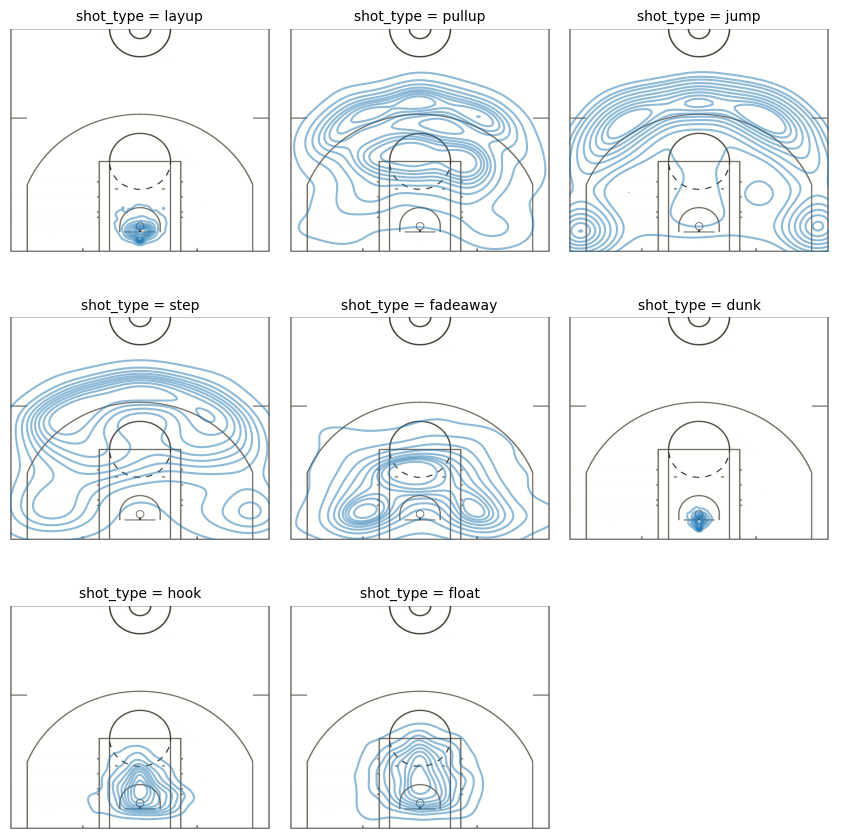

In [70]:
g = (sns.FacetGrid(dfs, col='shot_type', col_wrap=3)
    .map(sns.kdeplot, 'x', 'y', alpha=0.5, shade=False)
    .add_legend())

g.set(xticks=[], yticks=[], xlabel=None, ylabel=None)

g.despine(left=True, bottom=True)

for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[-250, 250, -30, 400])
    
plt.show()

# Exercises

6.1

a) Using the team game data, plot the distribution of three point attempts. Make sure to give your plot a title

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


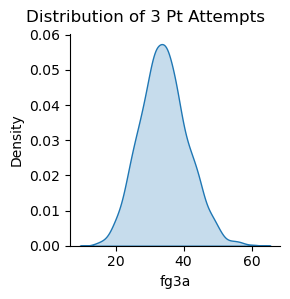

In [71]:
g = (sns.FacetGrid(dftg)
    .map(sns.kdeplot, 'fg3a', shade=True))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of 3 Pt Attempts')
plt.show()

b) Now modify your plot to show the distribution of the three point attempts by wether the team won. Do it as separate colors on the same plot c) and as separate plots

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


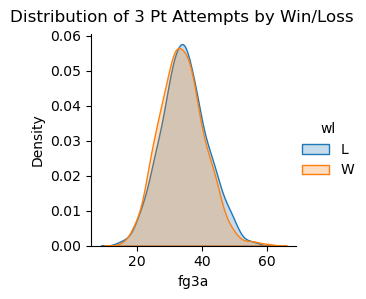

In [72]:
g = (sns.FacetGrid(dftg, hue='wl')
    .map(sns.kdeplot, 'fg3a', shade=True)
    .add_legend())
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of 3 Pt Attempts by Win/Loss')
plt.show()

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


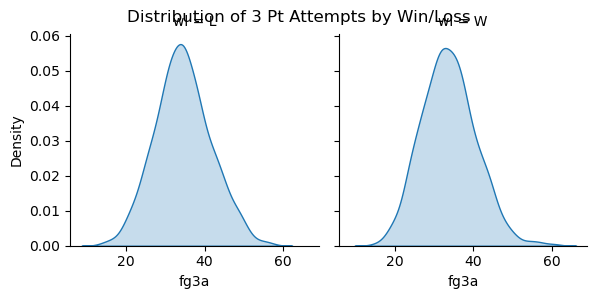

In [73]:
g = (sns.FacetGrid(dftg, col='wl')
    .map(sns.kdeplot, 'fg3a', shade=True)
    .add_legend())
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of 3 Pt Attempts by Win/Loss')
plt.show()

d) Sometimes it's effective to use multiple keywords("levers") to display redundant information, experiment with this

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


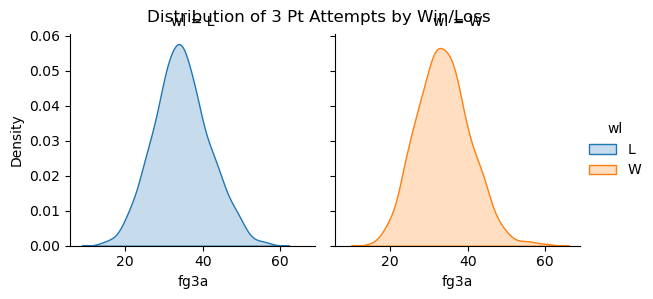

In [74]:
g = (sns.FacetGrid(dftg, col='wl', hue='wl')
    .map(sns.kdeplot, 'fg3a', shade=True)
    .add_legend())
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of 3 Pt Attempts by Win/Loss')
plt.show()

e) Plot the three point attempts by team, with each team on its own plot. Make sure to limit the number of columns so your plot isn't just one wide row

C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Maintenant pret\OneDrive\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated

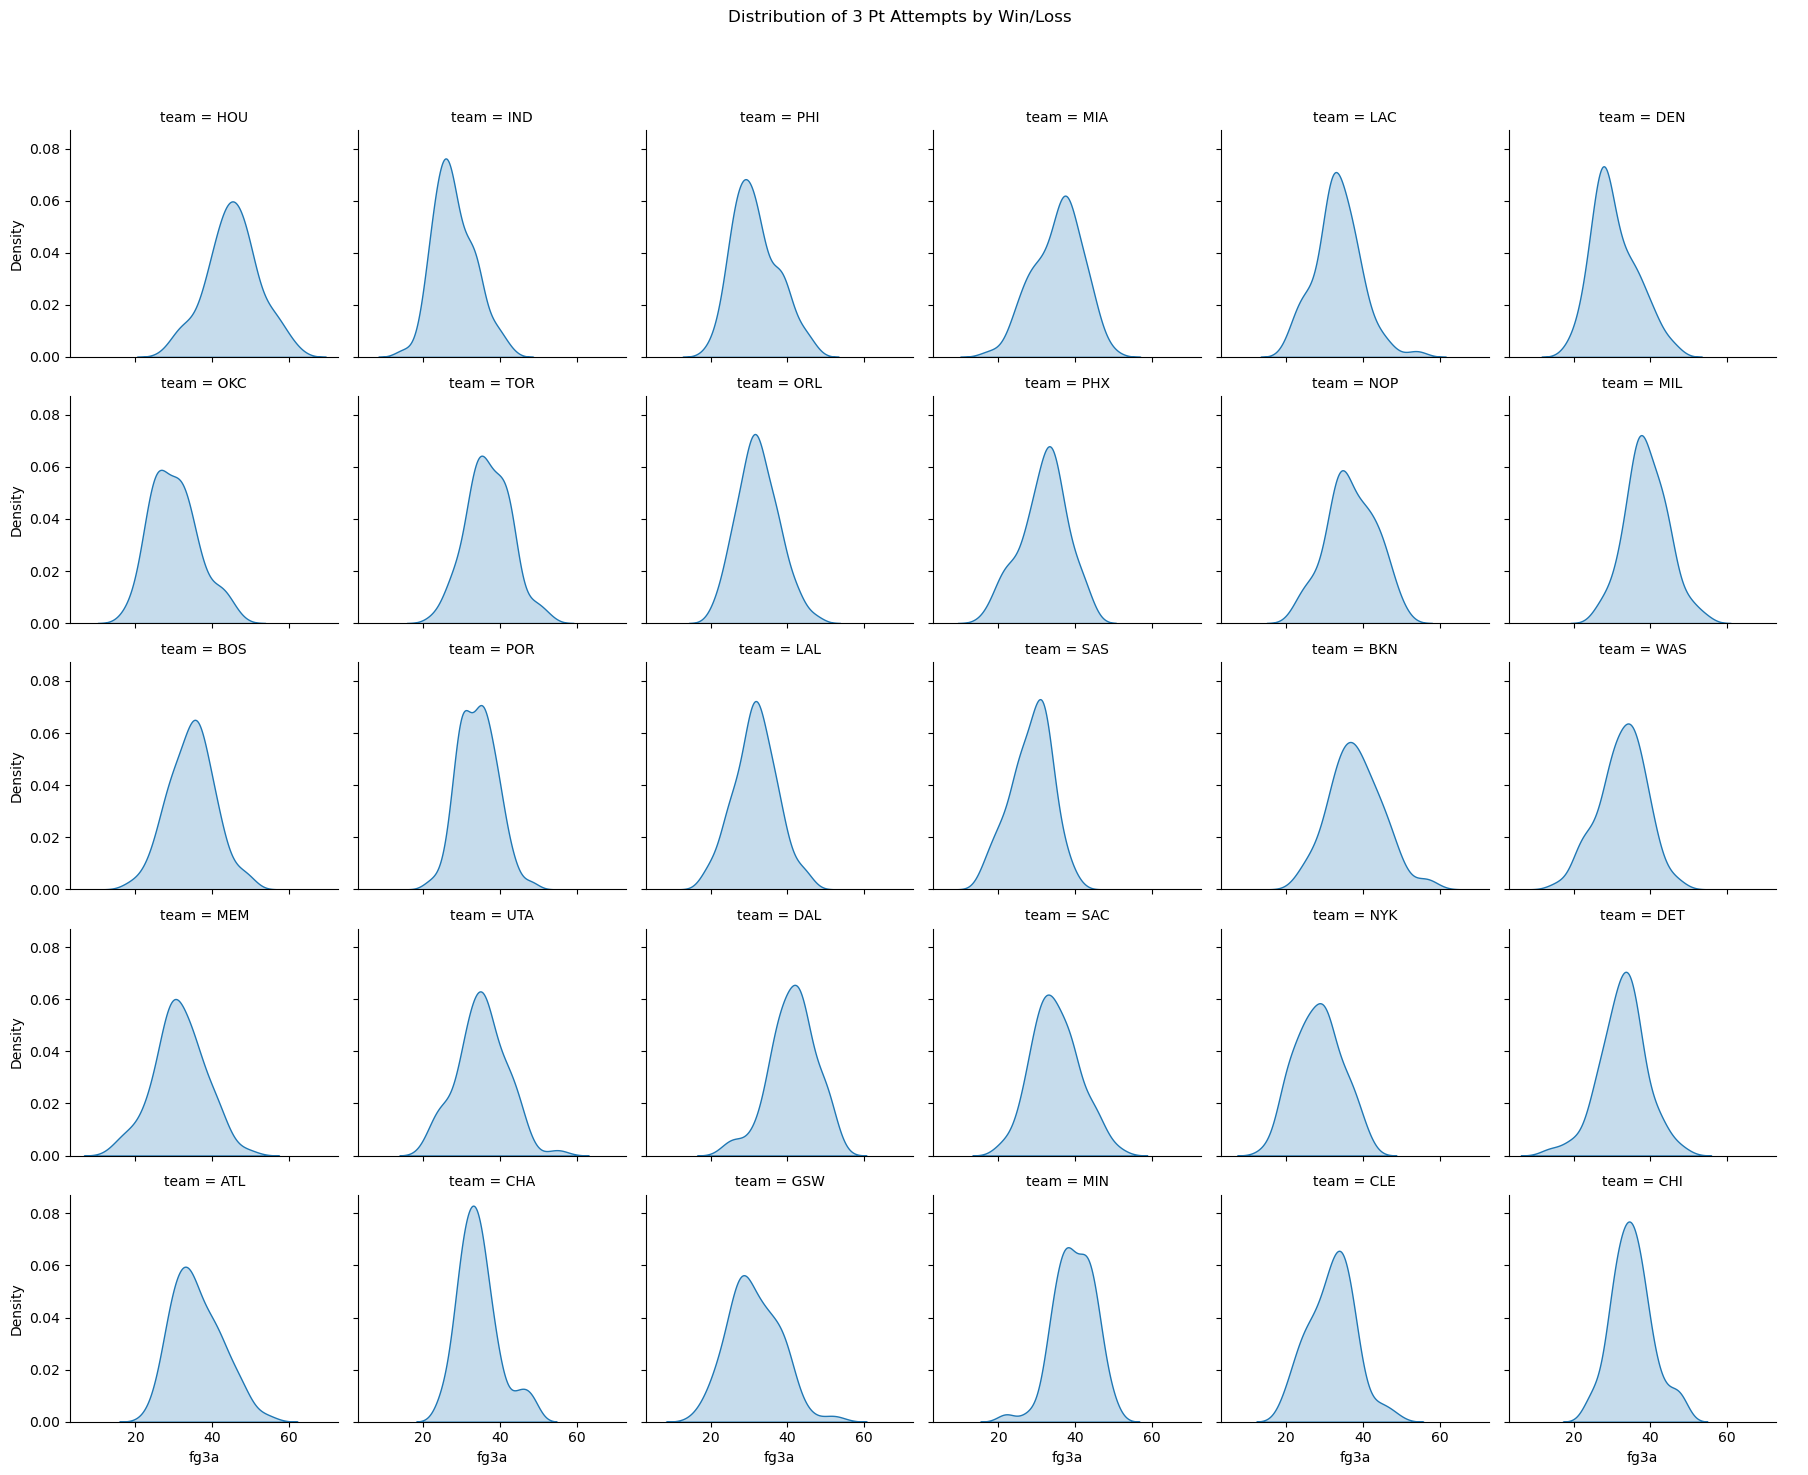

In [75]:
g = (sns.FacetGrid(dftg, col='team', col_wrap=6)
    .map(sns.kdeplot, 'fg3a', shade=True)
    .add_legend())
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of 3 Pt Attempts by Win/Loss')
plt.show()

6.2

a) Plot the relationship between three points attempts and the free throw percentage. Again, make sure your plot has a title

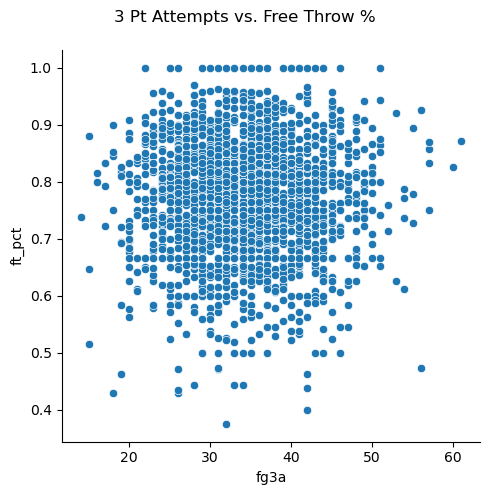

In [76]:
g = sns.relplot(x='fg3a', y='ft_pct', data=dftg)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('3 Pt Attempts vs. Free Throw %')
plt.show()

b) Jitter three point attempts and run the scatter plot again

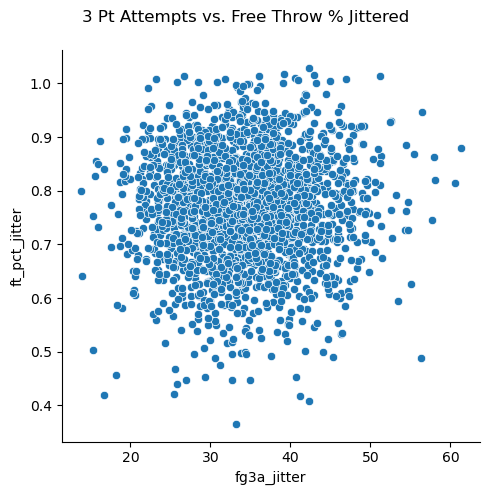

In [77]:
dftg['fg3a_jitter'] = dftg['fg3a'].apply(lambda x: x + random.gauss(0, 1))
dftg['ft_pct_jitter'] = dftg['ft_pct'].apply(lambda x: x + random.gauss(0, 0.01))

g = sns.relplot(x='fg3a_jitter', y='ft_pct_jitter', data=dftg)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('3 Pt Attempts vs. Free Throw % Jittered')
plt.show()

c) It's hard to tell wether this cloud of points is moving upward to the right or not. Check the correlation between these two variables numerically

In [78]:
dftg[['fg3a', 'ft_pct']].corr()

fg3a    ft_pct
fg3a    1.000000  0.021371
ft_pct  0.021371  1.000000